# Import the Necessary Liabraries

In [154]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [155]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/refs/heads/master/Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


So here we have 1000 rows and 40 columns in data
  -  fraud_reported is our target variable

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

- Here we have 19 numerical and 21 object columns present in the dataset.

In [94]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

- There is no null values present in the columns except authorities_contacted and _c39 columns so _c39 is dropping and in authorities_contacted column null values are filling by imputation techniques.

In [95]:
#droping _c39 column so dropping it
df.drop('_c39',axis=1,inplace=True)

In [96]:
df.shape

(1000, 39)

<Axes: >

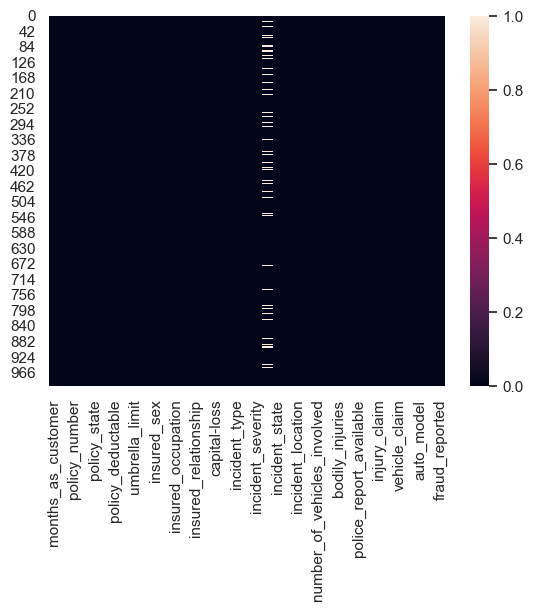

In [97]:
#Let's visualize the null value clearly
sns.heatmap(df.isnull())

In [98]:
df['authorities_contacted'].mode()

0    Police
Name: authorities_contacted, dtype: object

- We can fill the null values using this mode in authorities_contacted column

In [99]:
#Let's fill the null values of categorical column by their mode.
df['authorities_contacted']=df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0])

In [100]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

- Now we have removed all the null values using imputation method and the data is now clean. So we can move further.

<Axes: >

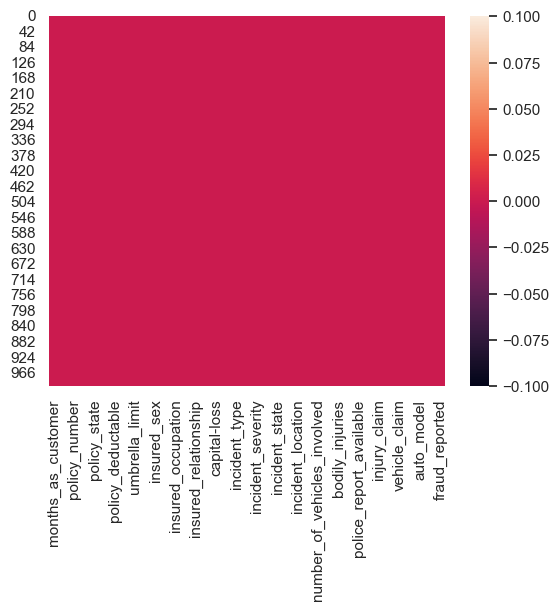

In [101]:
#Let's visualize  the null values clearly
sns.heatmap(df.isnull())

- So it is clear that there are no missing values present in the dataset.

In [102]:
#printing all data type and their unique values
for column in df.columns:
    if df[column].dtypes==object:
        print(df[column].value_counts())
        print('*****************************************************************************')

policy_bind_date
01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: count, Length: 951, dtype: int64
*****************************************************************************
policy_state
OH    352
IL    338
IN    310
Name: count, dtype: int64
*****************************************************************************
policy_csl
250/500     351
100/300     349
500/1000    300
Name: count, dtype: int64
*****************************************************************************
insured_sex
FEMALE    537
MALE      463
Name: count, dtype: int64
*****************************************************************************
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: count, dtype: int64
*****************************************************

In [103]:
#statistics summary of numerical columns
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


This gives the statistcal information of the numerical columns. The summary of this dataset looks perfect.

From the above description we can observe the following things.

- The count of all the columns are same which means there are no missing values in the dataset.

- The mean value is greater  than the median(50%) in most of the columns which means the data is skewed to right in these columns.

- The data in the few columns have mean value less than median that means the data is skewed to left.

- By summerising the data we can observe there is huge difference between 75% and max in most of the columns hence there are outliers present inthe data which we will remove them leter on using approprate methods.

- We can also notice the standard deviation, min, 25% percentile values from this describe method.

In [104]:
df['umbrella_limit'].value_counts()

umbrella_limit
 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: count, dtype: int64

- We can see there is one row in negative value must be mistake or not sure so dropping the row.

In [105]:
df.loc[df['umbrella_limit']== -1000000]

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
290,284,42,526039,04-05-1995,OH,100/300,500,1338.54,-1000000,438178,...,1,?,94160,8560,17120,68480,Chevrolet,Malibu,1996,N


In [106]:
#dropping that value row(one row only)
df.drop(df[df['umbrella_limit']== -1000000].index,inplace=True)

In [107]:
# dividing ['incident_date'] into three other columns
df['incident_Date']=df['incident_date'].str.split('-').str[0]
df['incident_Month']=df['incident_date'].str.split('-').str[1]
df['incident_Year']=df['incident_date'].str.split('-').str[2]

In [108]:
df['incident_Year']

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
995    2015
996    2015
997    2015
998    2015
999    2015
Name: incident_Year, Length: 999, dtype: object

In [109]:
df['incident_Year'].value_counts()

incident_Year
2015    999
Name: count, dtype: int64

In [110]:
#in incident_Year all the incident is from 2015 so dropping the incident_year
df.drop('incident_Year',axis=1,inplace=True)

In [111]:
#dividing policy_bind_date into three other columns
df['policy_bind_Date']=df['policy_bind_date'].str.split('-').str[0]
df['policy_bind_Month']=df['policy_bind_date'].str.split('-').str[1]
df['policy_bind_Year']=df['policy_bind_date'].str.split('-').str[2]

#droping policy_bind_date column
df.drop('policy_bind_date',axis=1,inplace=True)

In [112]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,incident_Date,incident_Month,policy_bind_Date,policy_bind_Month,policy_bind_Year
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,52080,Saab,92x,2004,Y,25,01,17,10,2014
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,3510,Mercedes,E400,2007,Y,21,01,27,06,2006
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,23100,Dodge,RAM,2007,N,22,02,06,09,2000
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,50720,Chevrolet,Tahoe,2014,Y,10,01,25,05,1990
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,4550,Accura,RSX,2009,N,17,02,06,06,2014


In [113]:
#droping the policy_number and other useless columns as well
df.drop(['policy_number','insured_zip','incident_location'],axis=1,inplace=True)

In [114]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,incident_Date,incident_Month,policy_bind_Date,policy_bind_Month,policy_bind_Year
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,52080,Saab,92x,2004,Y,25,01,17,10,2014
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,3510,Mercedes,E400,2007,Y,21,01,27,06,2006
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,23100,Dodge,RAM,2007,N,22,02,06,09,2000
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,50720,Chevrolet,Tahoe,2014,Y,10,01,25,05,1990
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,4550,Accura,RSX,2009,N,17,02,06,06,2014


In [115]:
df.shape

(999, 40)

In [116]:
df['fraud_reported'].value_counts()

fraud_reported
N    752
Y    247
Name: count, dtype: int64

<Axes: xlabel='fraud_reported', ylabel='count'>

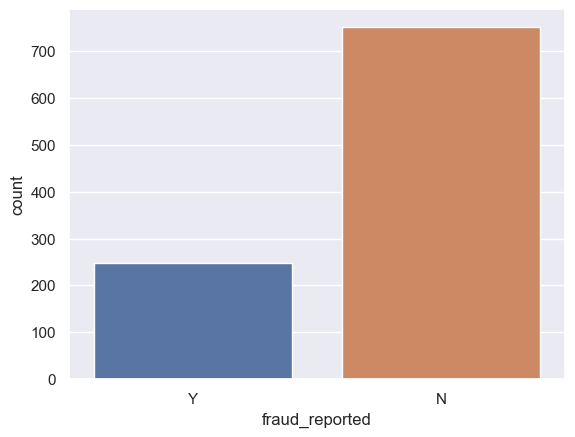

In [117]:
sns.countplot(x=df['fraud_reported'])

- We can notice data is imblance we chave to deal with it.

# Exploratory Data Analysis(EDA)

In [118]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,incident_Date,incident_Month,policy_bind_Date,policy_bind_Month,policy_bind_Year
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,52080,Saab,92x,2004,Y,25,01,17,10,2014
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,3510,Mercedes,E400,2007,Y,21,01,27,06,2006
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,23100,Dodge,RAM,2007,N,22,02,06,09,2000
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,50720,Chevrolet,Tahoe,2014,Y,10,01,25,05,1990
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,4550,Accura,RSX,2009,N,17,02,06,06,2014


<Axes: >

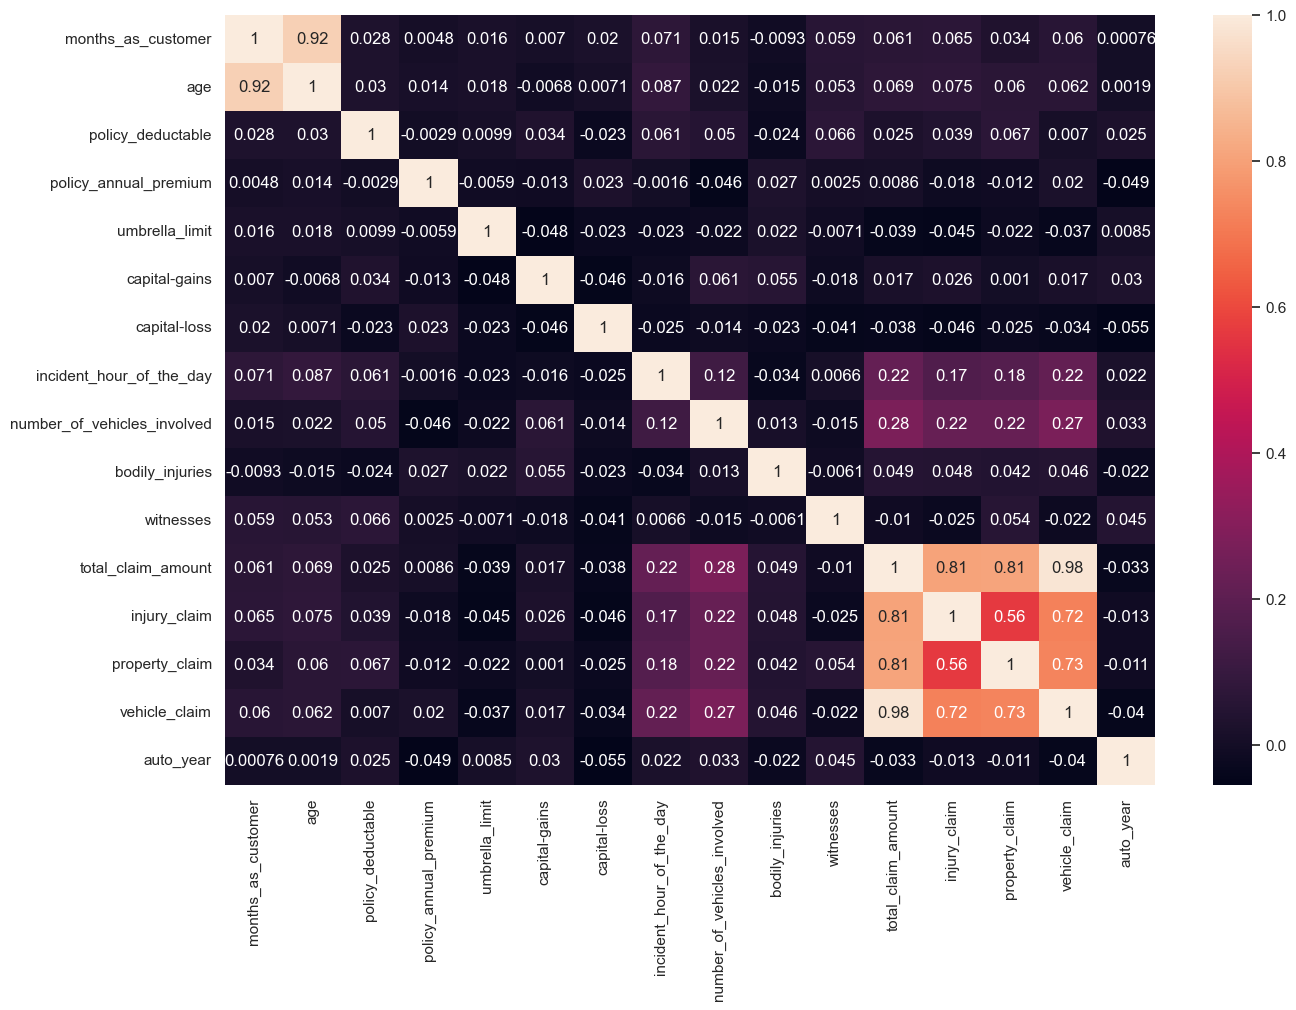

In [119]:
numeric_df = df.select_dtypes(include=['float64','int64'])
plt.figure(figsize=(15,10))
sns.heatmap(numeric_df.corr(),annot=True)

- We can notice total_claim_amount, injury_claim, property_claim and vehicle_claim ard highly correlated with each other.
- All other columns are very least correlated with each other.

<Axes: xlabel='fraud_reported', ylabel='total_claim_amount'>

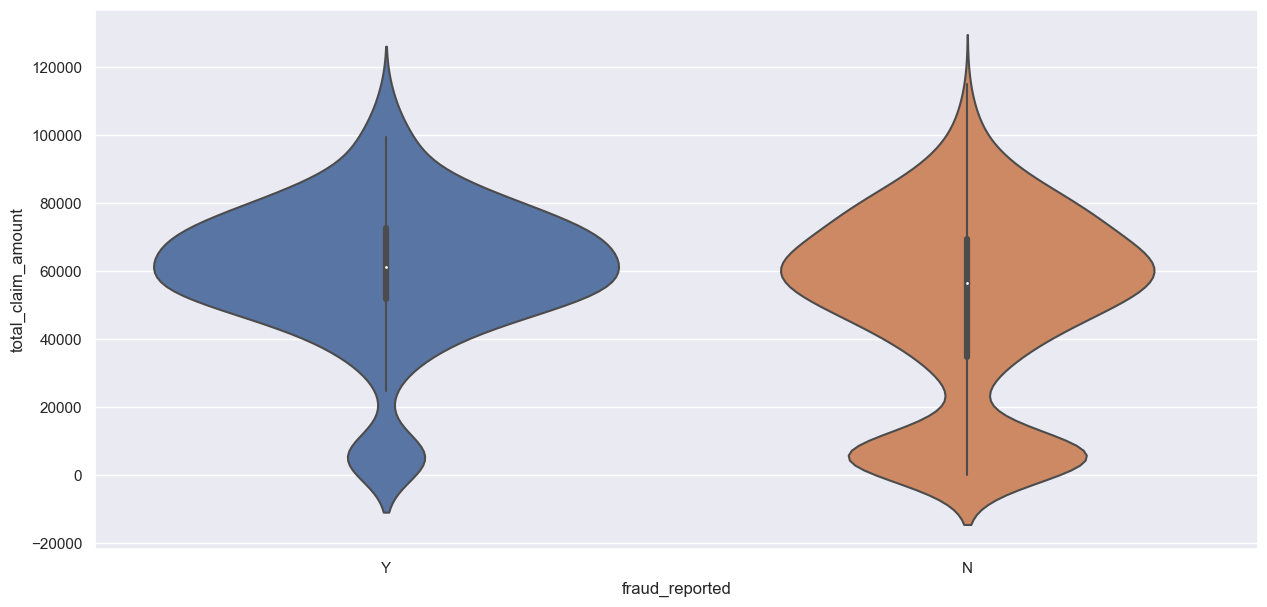

In [120]:
plt.figure(figsize=(15,7))
sns.violinplot(y='total_claim_amount',x='fraud_reported',data=df)

- Most of fraud reported found where total claimed amount 50000 to 70000

<Axes: xlabel='number_of_vehicles_involved', ylabel='count'>

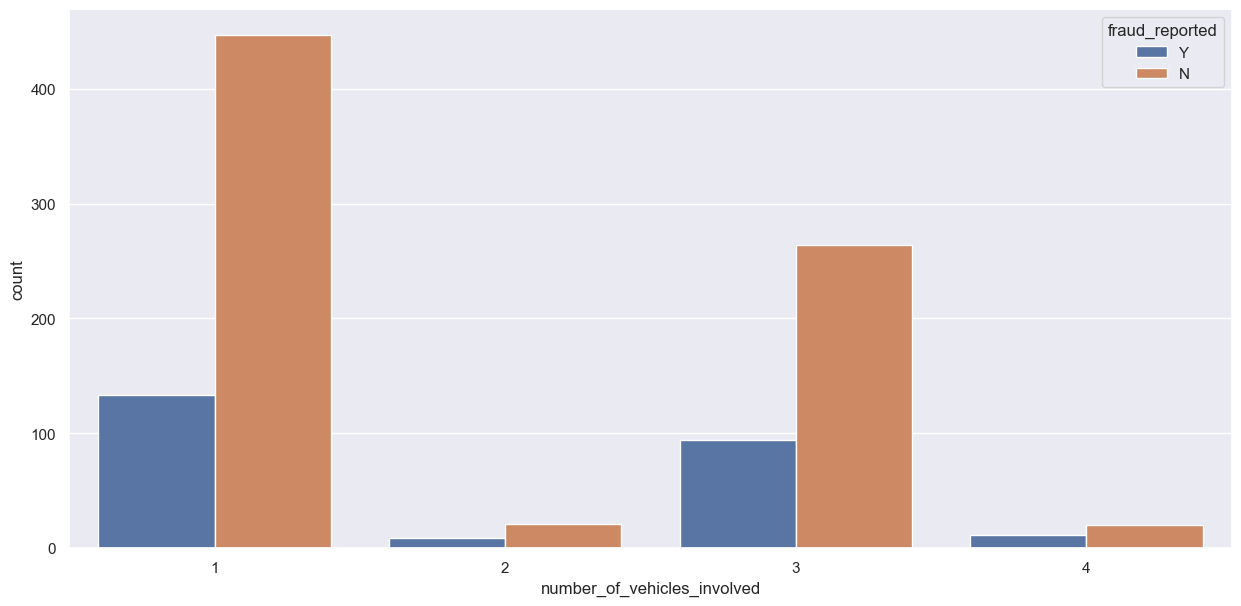

In [121]:
plt.figure(figsize=(15,7))
sns.countplot(x='number_of_vehicles_involved',hue='fraud_reported',data=df)

- Most of the fraud report were found where number_of_vehicles_involved more than 1

<Axes: xlabel='incident_city', ylabel='count'>

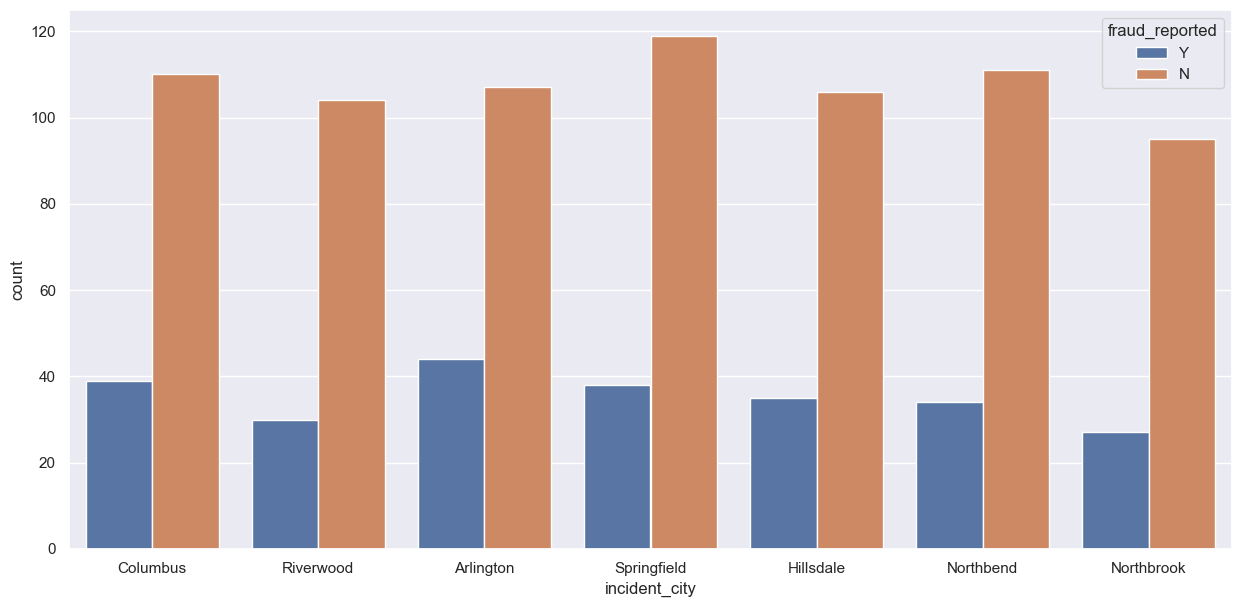

In [122]:
plt.figure(figsize=(15,7))
sns.countplot(x='incident_city',hue='fraud_reported',data=df)

- In all cities fraud reported counts are almost same.

<Axes: xlabel='incident_state', ylabel='count'>

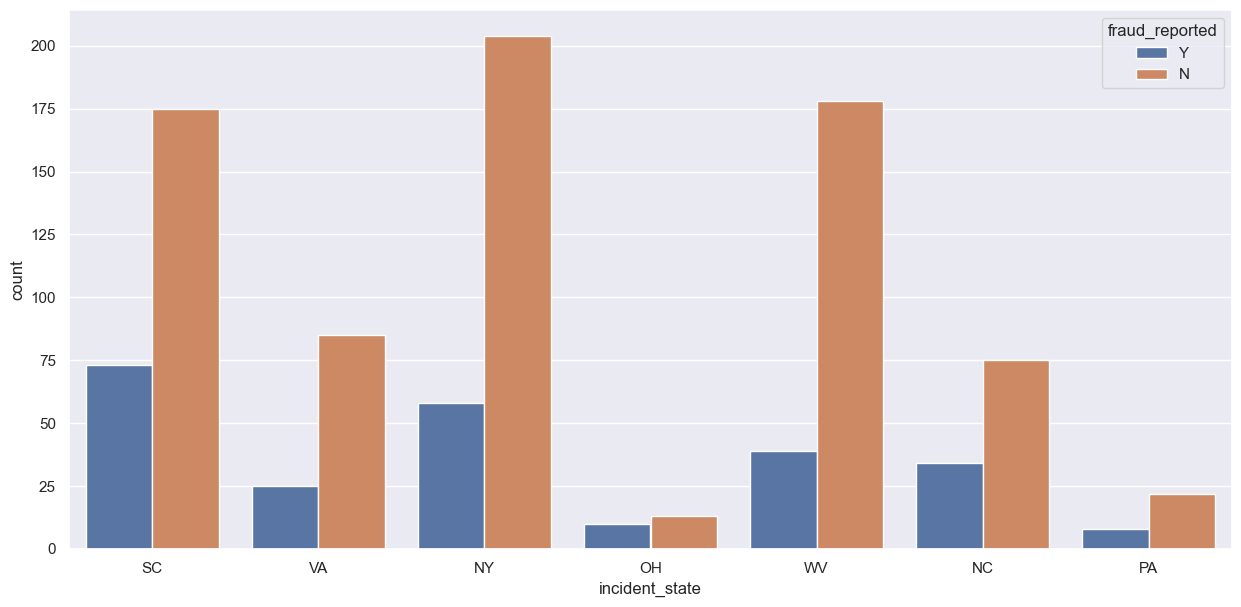

In [123]:
plt.figure(figsize=(15,7))
sns.countplot(x='incident_state',hue='fraud_reported',data=df)

- Most of the fraud reported were found where incident state was SC,NY,OH,NC and PA

<Axes: xlabel='authorities_contacted', ylabel='count'>

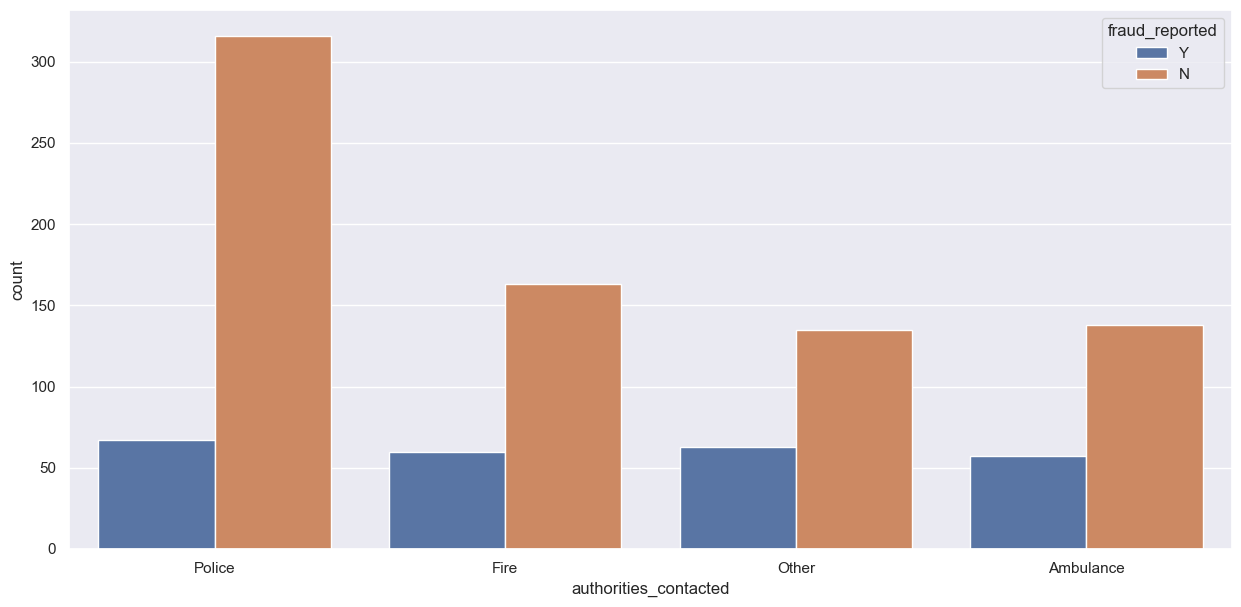

In [124]:
plt.figure(figsize=(15,7))
sns.countplot(x='authorities_contacted',hue='fraud_reported',data=df)

- In all authorities_contacted fraud reported count are almost same

<Axes: xlabel='incident_severity', ylabel='count'>

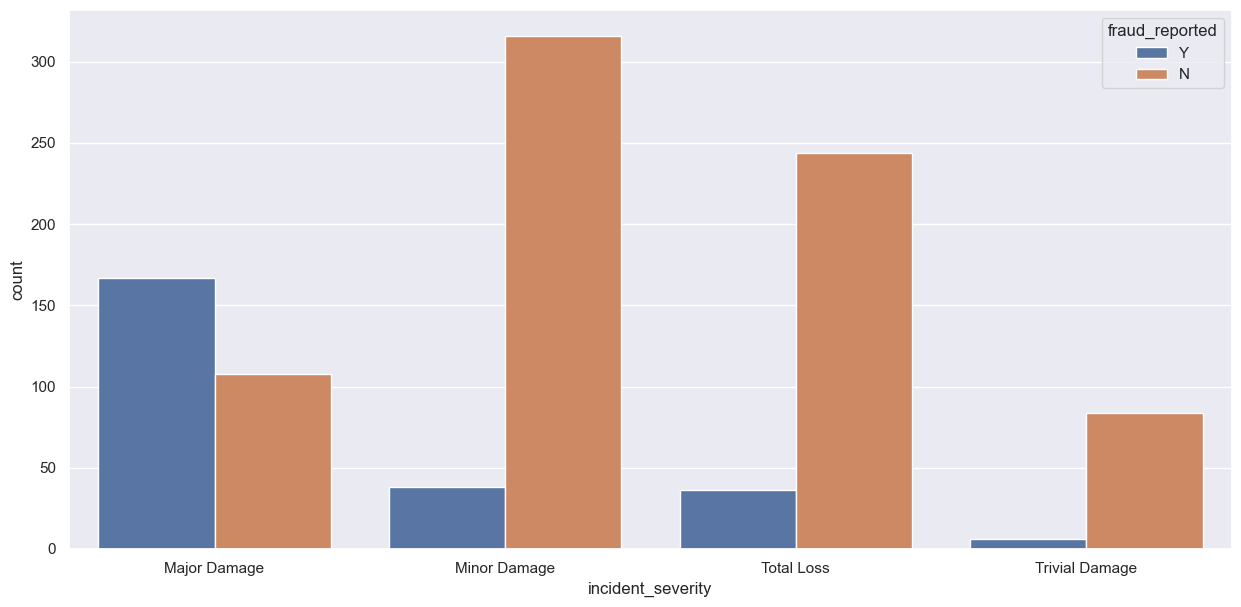

In [125]:
plt.figure(figsize=(15,7))
sns.countplot(x='incident_severity',hue='fraud_reported',data=df)

- Most of fraud reported claim are Major Damage, most of them are counted as fraud
- Ther are less fraud reported claim in Trivial Damage.

<Axes: xlabel='collision_type', ylabel='count'>

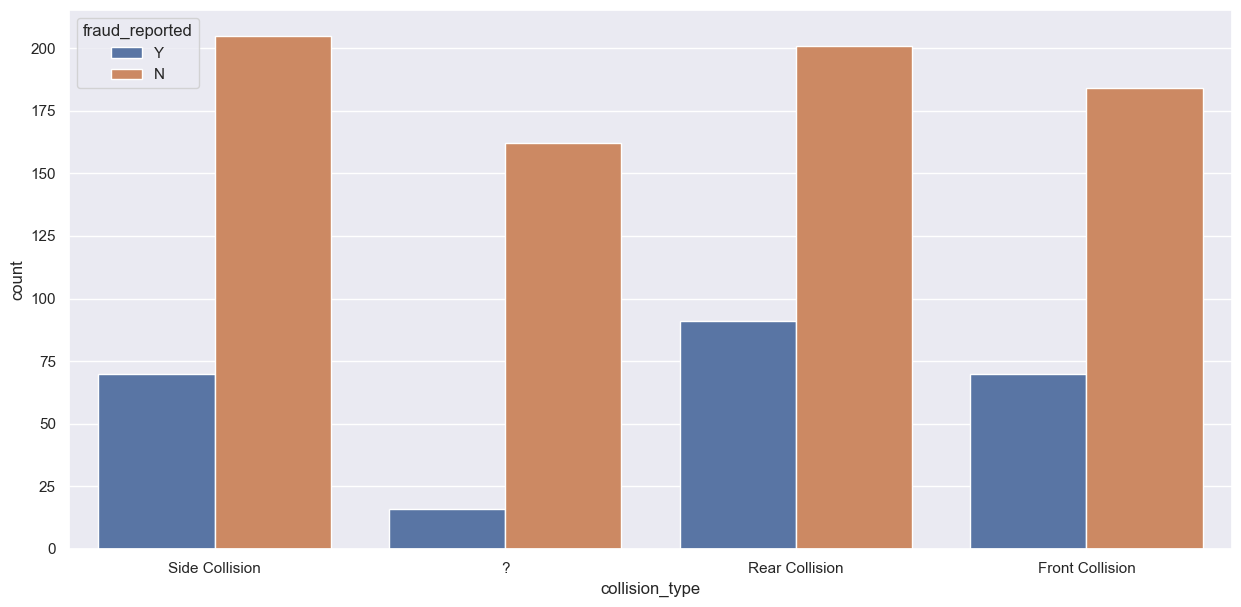

In [126]:
plt.figure(figsize=(15,7))
sns.countplot(x='collision_type',hue='fraud_reported',data=df)

- Most of fraud reported claims in Side Collision, Rear Collision and Front Collision
- Some of reported claim we have those are in no info of Collision type.

<Axes: xlabel='incident_type', ylabel='count'>

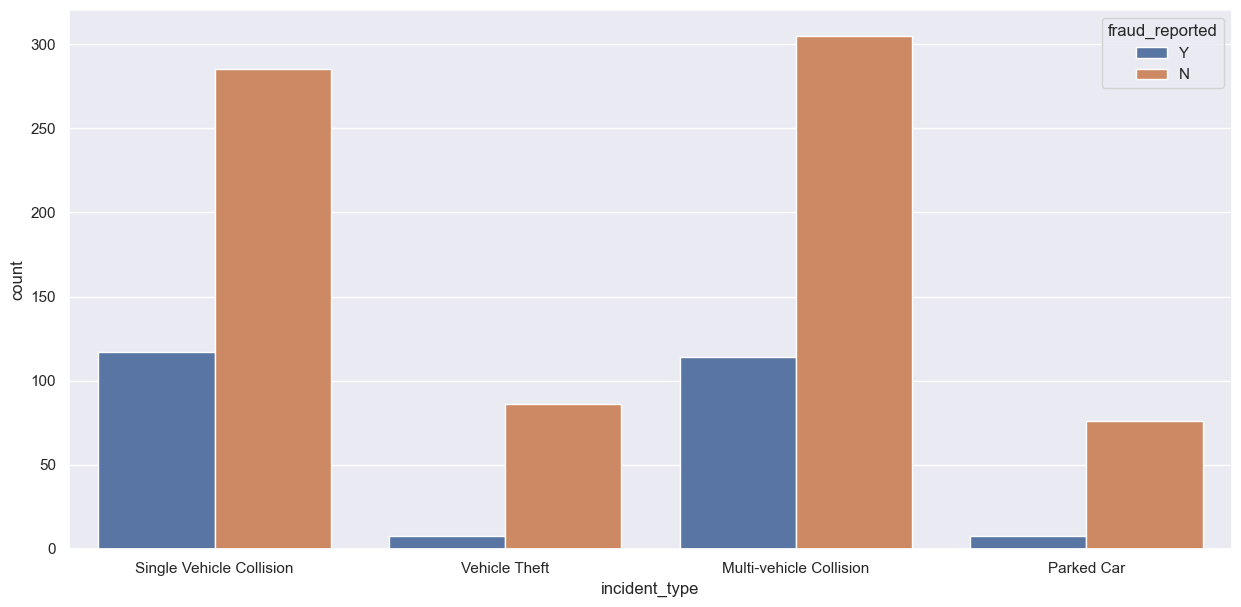

In [127]:
plt.figure(figsize=(15,7))
sns.countplot(x='incident_type',hue='fraud_reported',data=df)

- We have most claim reported and fraud reported in Single vehicle collision and mult-vehicle collision incident type.
- In other two incident type vehicle theft an parked car are very less fraud report.

<Axes: xlabel='incident_Month', ylabel='count'>

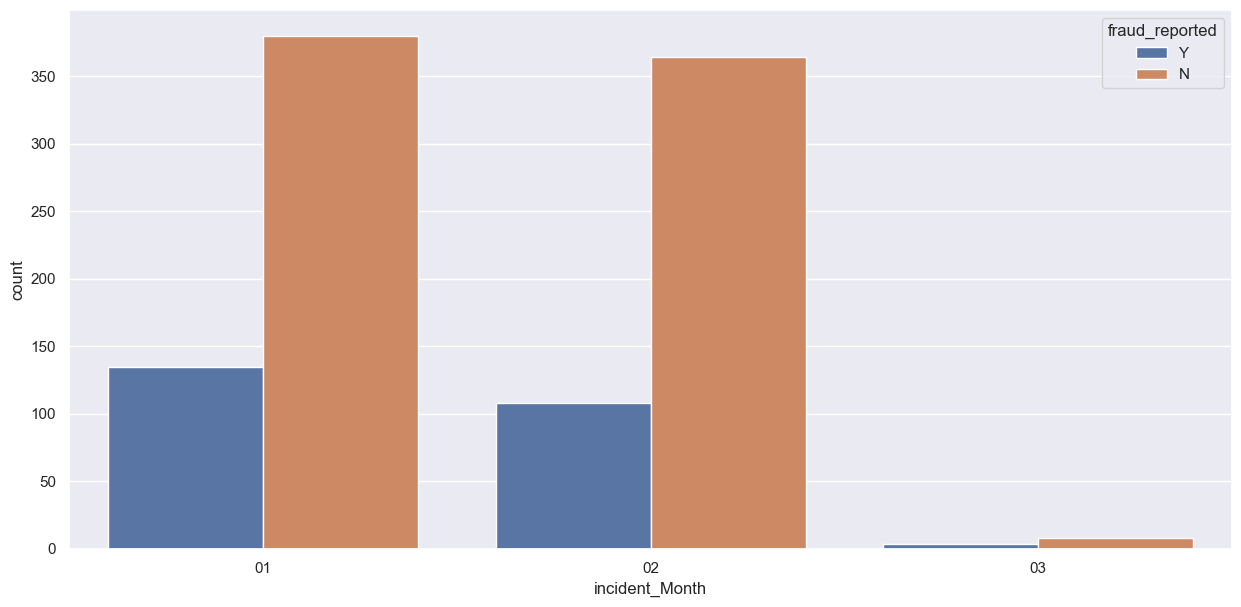

In [128]:
plt.figure(figsize=(15,7))
sns.countplot(x='incident_Month',hue='fraud_reported',data=df)

- Most of the data we have reported in month 1 and 2 fraud reported are also around same in both months.

<Axes: xlabel='fraud_reported', ylabel='capital-loss'>

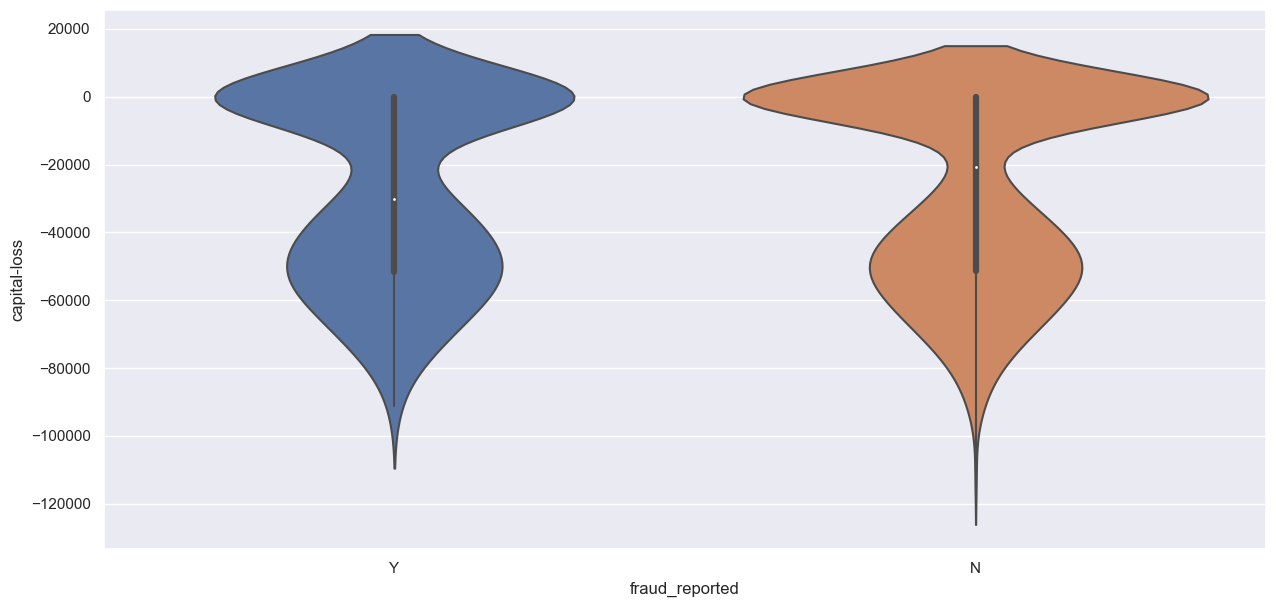

In [129]:
plt.figure(figsize=(15,7))
sns.violinplot(y='capital-loss',x='fraud_reported',data=df)

- Most of fraud reported we see in cx those capital loss are and -4000 to -6000

<Axes: xlabel='fraud_reported', ylabel='capital-gains'>

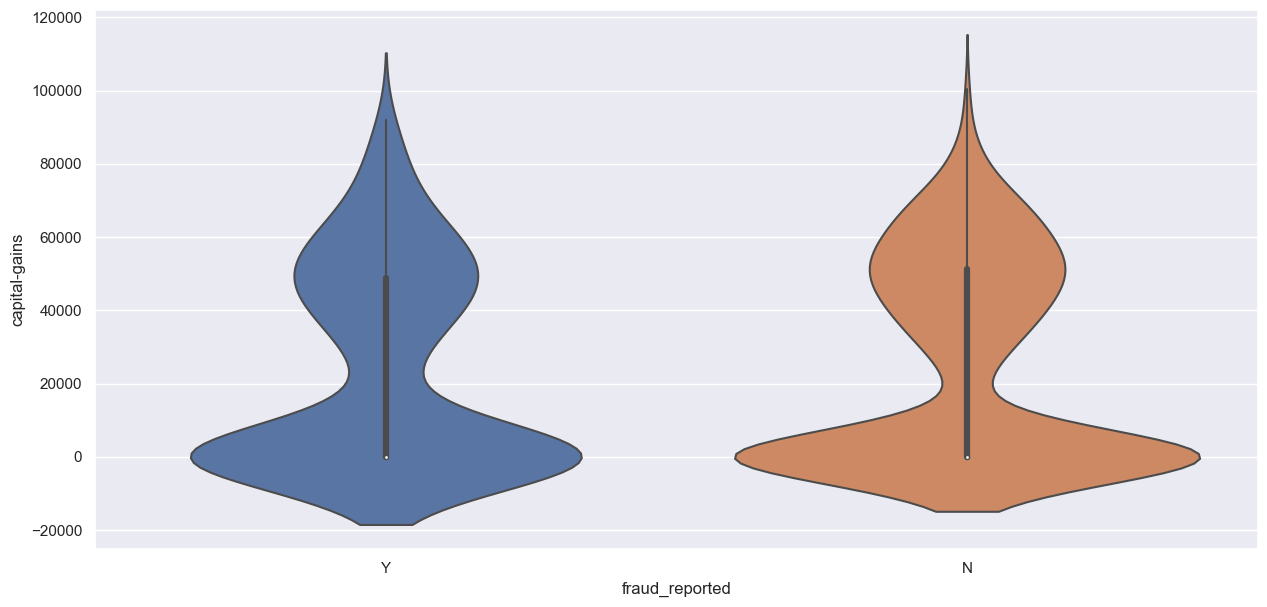

In [130]:
plt.figure(figsize=(15,7))
sns.violinplot(y='capital-gains',x='fraud_reported',data=df)

- Most of the fraud reported are in cx those capital gains are 0 and around 50000

<Axes: xlabel='insured_relationship', ylabel='count'>

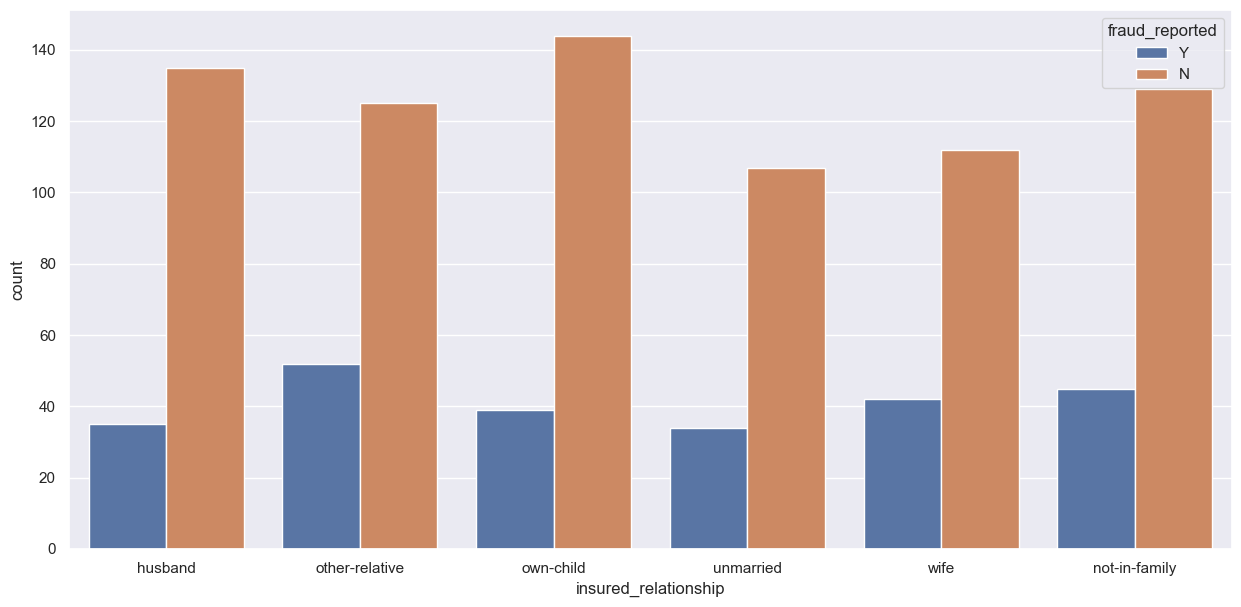

In [131]:
plt.figure(figsize=(15,7))
sns.countplot(x='insured_relationship',hue='fraud_reported',data=df)

- According to the data info, cx those having insured relationship with other relative and wife are most reported than others.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'sleeping'),
  Text(1, 0, 'reading'),
  Text(2, 0, 'board-games'),
  Text(3, 0, 'bungie-jumping'),
  Text(4, 0, 'base-jumping'),
  Text(5, 0, 'golf'),
  Text(6, 0, 'camping'),
  Text(7, 0, 'dancing'),
  Text(8, 0, 'skydiving'),
  Text(9, 0, 'movies'),
  Text(10, 0, 'hiking'),
  Text(11, 0, 'yachting'),
  Text(12, 0, 'paintball'),
  Text(13, 0, 'chess'),
  Text(14, 0, 'kayaking'),
  Text(15, 0, 'polo'),
  Text(16, 0, 'basketball'),
  Text(17, 0, 'video-games'),
  Text(18, 0, 'cross-fit'),
  Text(19, 0, 'exercise')])

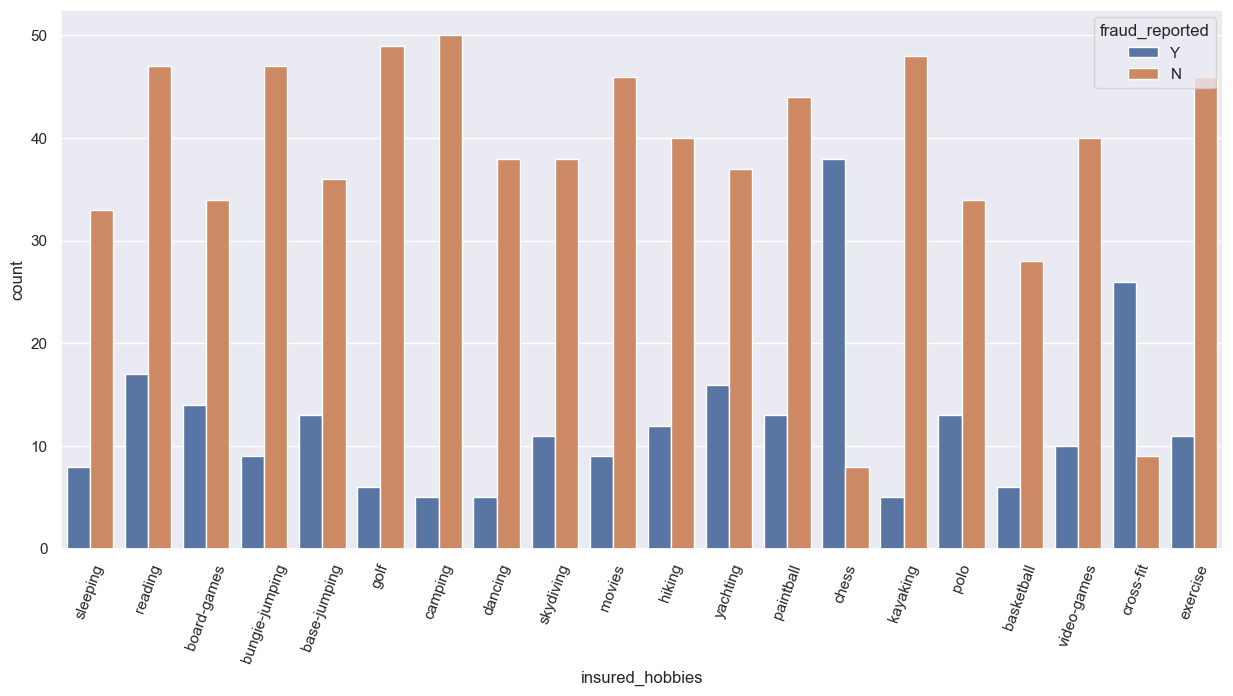

In [132]:
plt.figure(figsize=(15,7))
sns.countplot(x='insured_hobbies',hue='fraud_reported',data=df)
plt.xticks(rotation=70)

- Here we can see the cx those hobbies are Chess, are most fraud reported cx.
- Here we can see the cx those hobbies are cross-fit, are also most fraud reported cx.
- After that cx those hobbies are reading, board games, base-jumping, yeching ,painball, polo and etc also most fraud report cx than others.

<Axes: xlabel='fraud_reported', ylabel='vehicle_claim'>

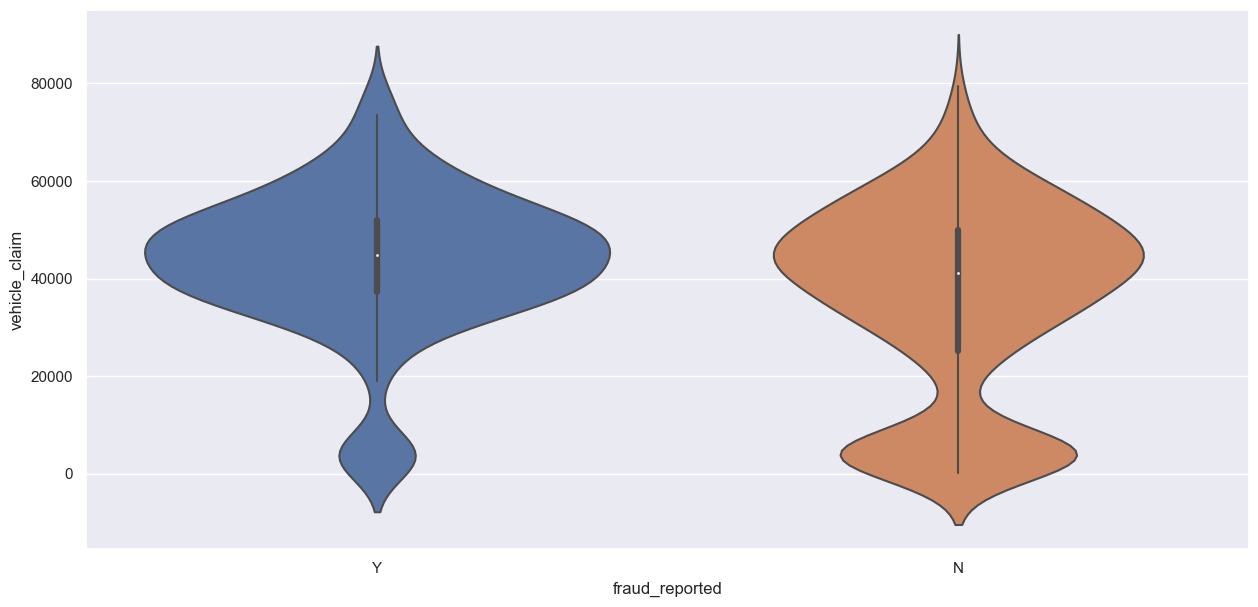

In [133]:
plt.figure(figsize=(15,7))
sns.violinplot(y='vehicle_claim',x='fraud_reported',data=df)

- In vehicle_claim most of the cx are between 100 to 6500
- Fraud report is higher in cx are between 3500 to 5500 vehicle_claim

<Axes: xlabel='fraud_reported', ylabel='property_claim'>

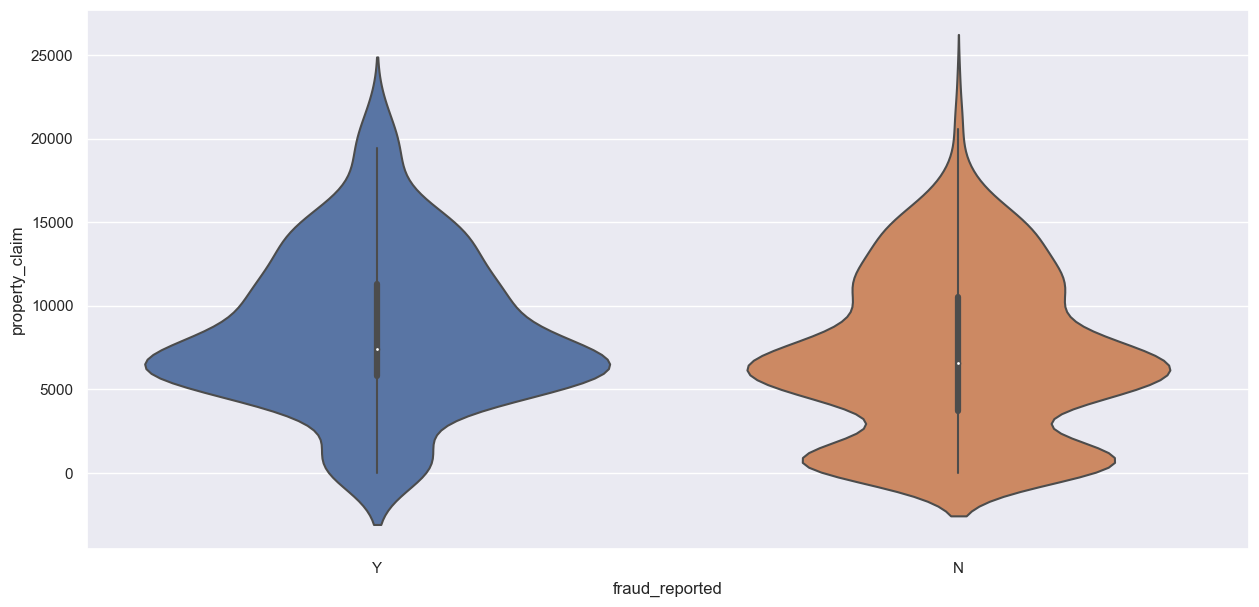

In [134]:
plt.figure(figsize=(15,7))
sns.violinplot(y='property_claim',x='fraud_reported',data=df)

- In property claim fraud reported is higher in cx claimed of 5000 to 8000

<Axes: xlabel='fraud_reported', ylabel='injury_claim'>

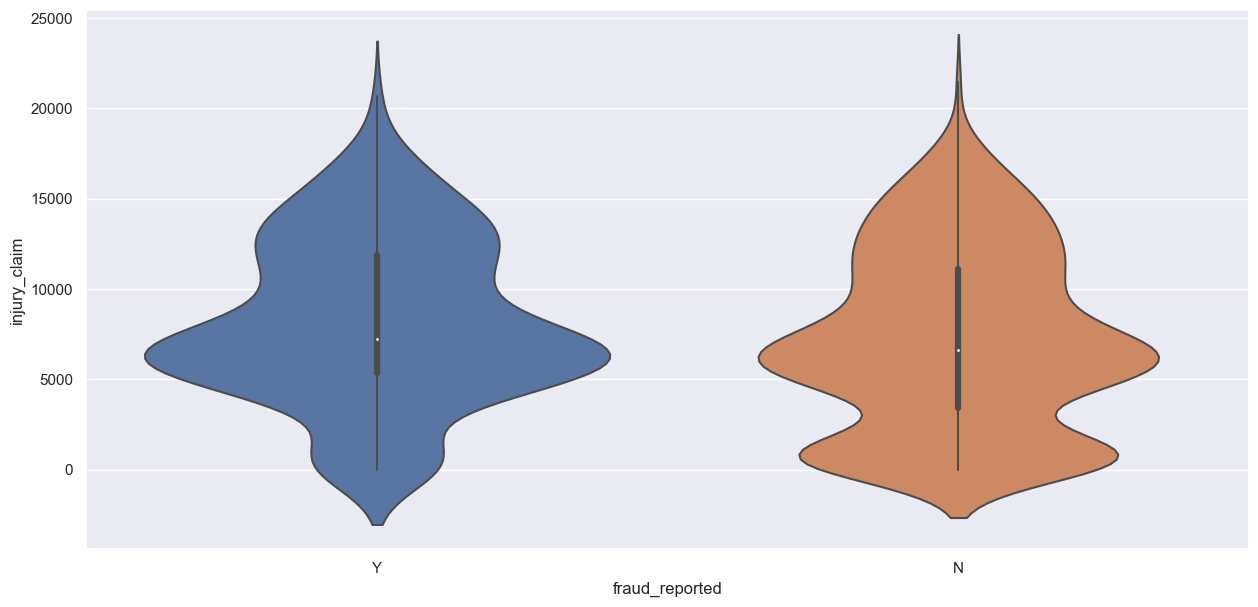

In [135]:
plt.figure(figsize=(15,7))
sns.violinplot(y='injury_claim',x='fraud_reported',data=df)

- Most of the cx injury claim is 100 to 15000
- Most fraud reported cx are between 5000 to 8000 injury claim

<Axes: xlabel='insured_education_level', ylabel='count'>

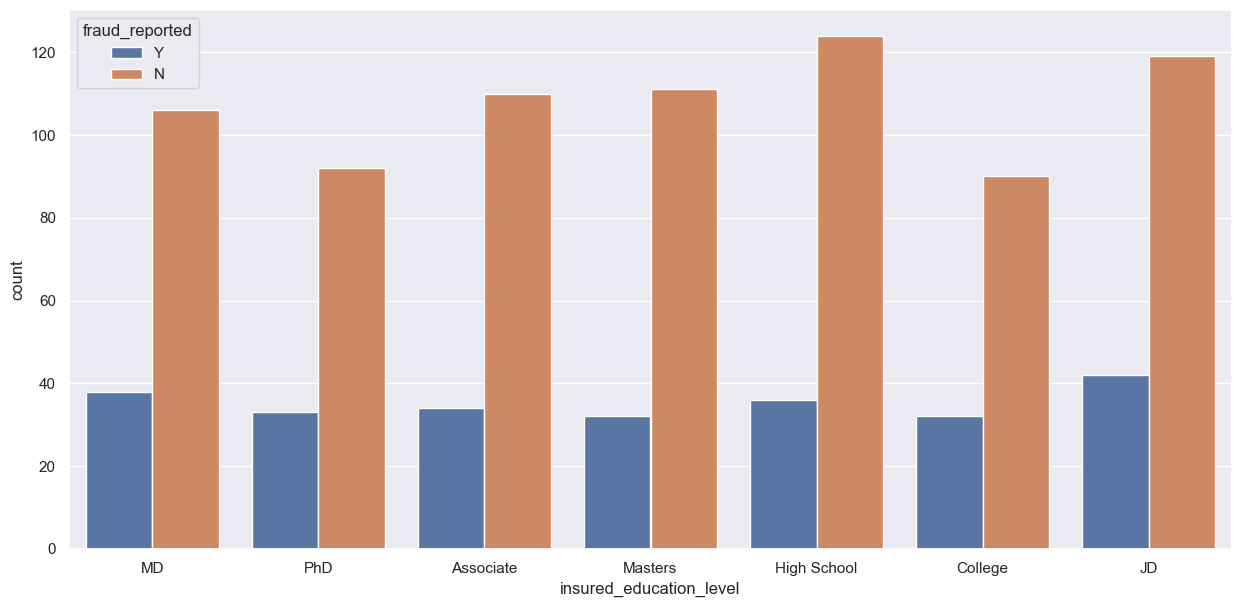

In [136]:
plt.figure(figsize=(15,7))
sns.countplot(x='insured_education_level',hue='fraud_reported',data=df)

- We higher cx those are education level is High School and least cx in PhD and college
- There is very little difference in fraud report in all kind of cx.
- Fraud report is little higher in cx those education level is JD,MD PhD and College than others.

<Axes: xlabel='insured_sex', ylabel='count'>

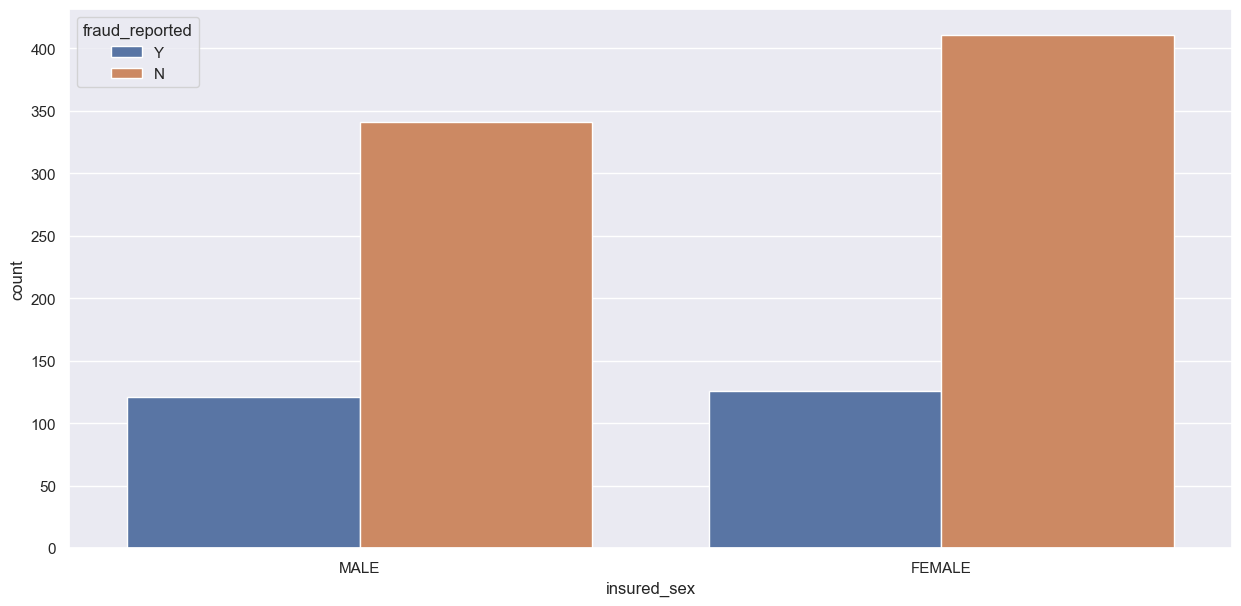

In [137]:
plt.figure(figsize=(15,7))
sns.countplot(x='insured_sex',hue='fraud_reported',data=df)

- We have more cx in Female than the Male
- But fraud reported is little high Male cx.

<Axes: xlabel='fraud_reported', ylabel='umbrella_limit'>

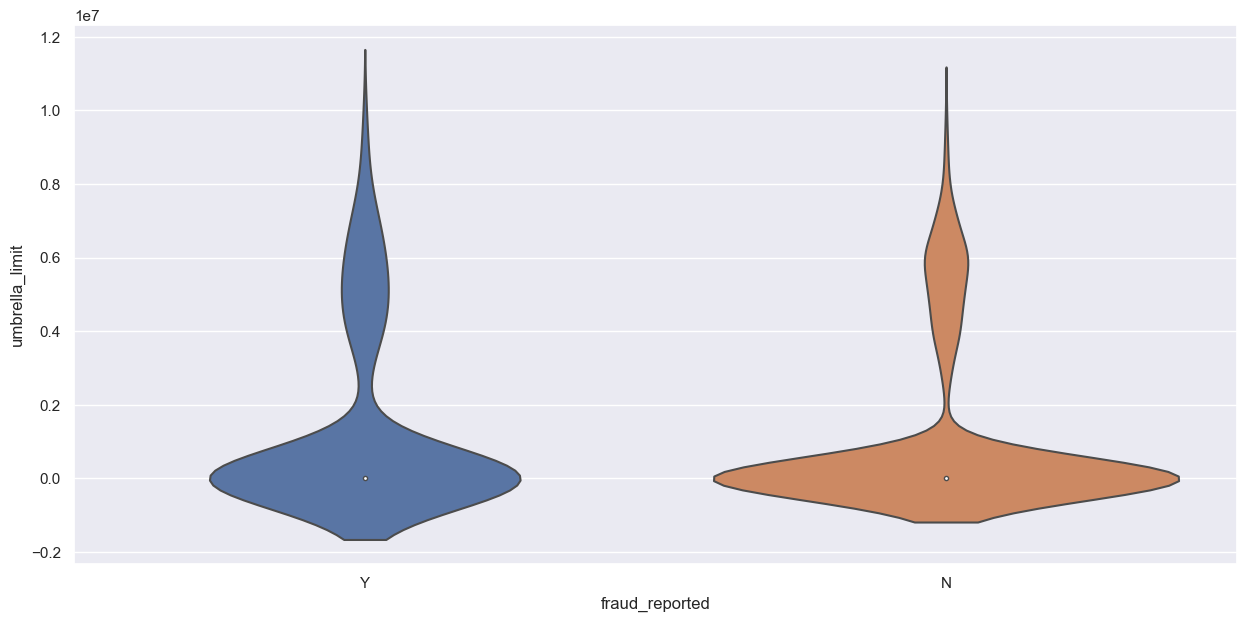

In [138]:
plt.figure(figsize=(15,7))
sns.violinplot(x='fraud_reported',y='umbrella_limit',data=df)

- Most of cx we have their umbrella limit is 0
- fraud reported is also high those cx

<Axes: xlabel='fraud_reported', ylabel='policy_annual_premium'>

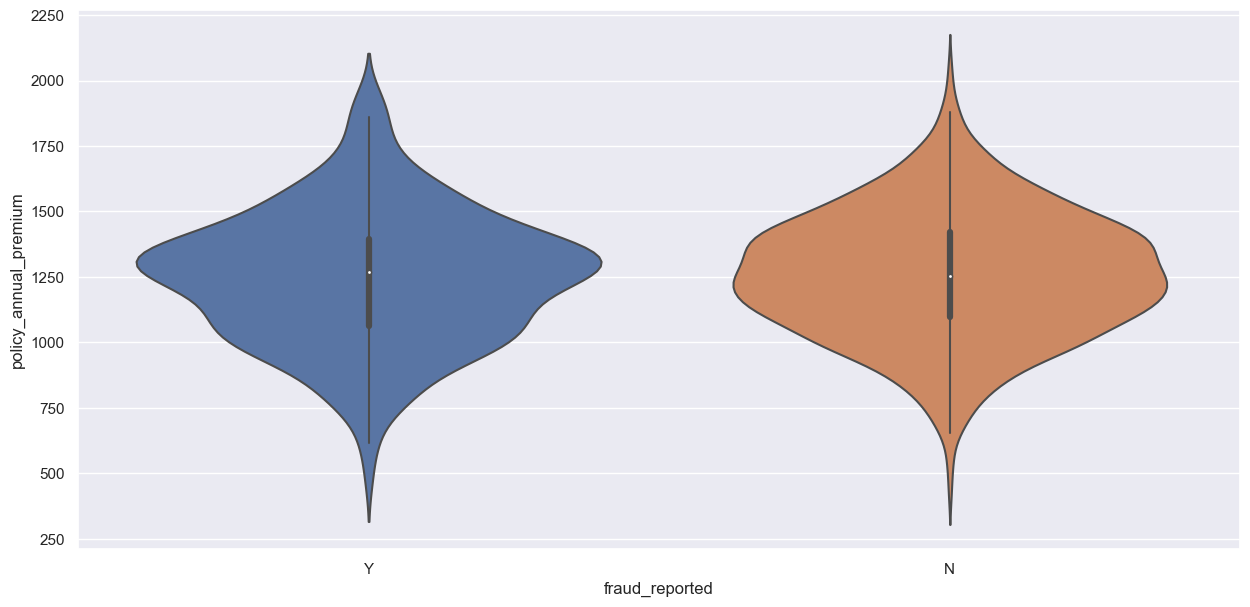

In [139]:
plt.figure(figsize=(15,7))
sns.violinplot(x='fraud_reported',y='policy_annual_premium',data=df)

- Most of cx we have 1000 to 1500 of premium payers
- Most of the fraud reported we found in those premium is 1250 to 1300

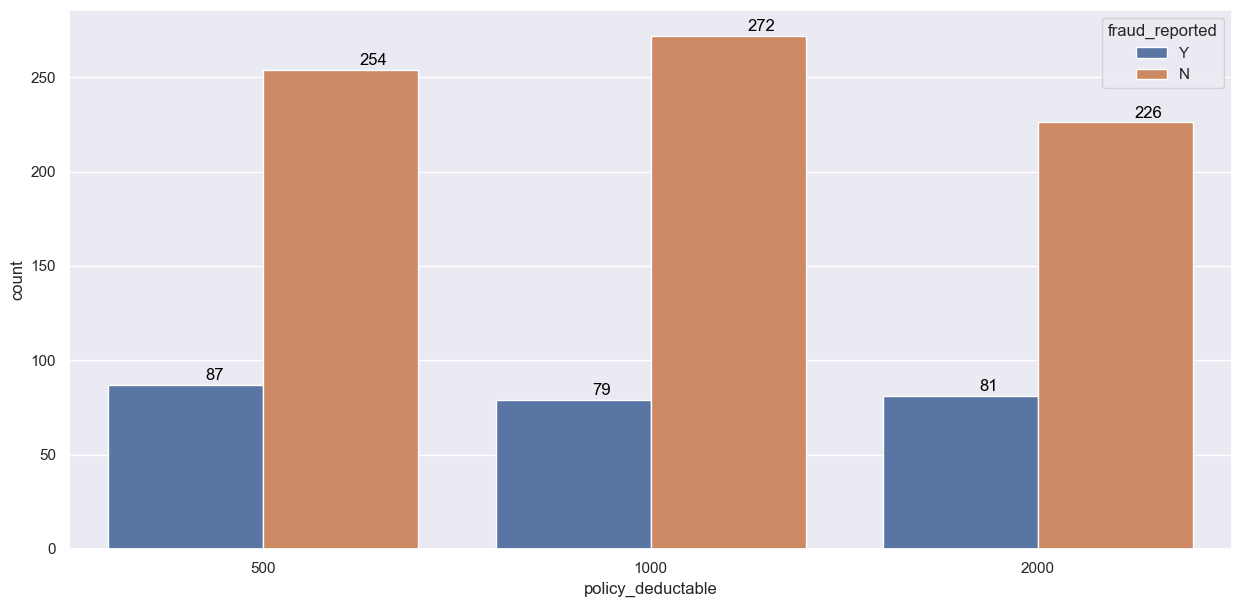

In [140]:
plt.figure(figsize=(15,7))
ax=sns.countplot(x='policy_deductable',hue='fraud_reported',data=df)
for p in ax.patches:
    ax.annotate(int(p.get_height()),(p.get_x()+0.25, p.get_height()+1), va='bottom',color='black')

- Here we notice here according to count fraud report high in cx of 2000 policy_deductable

<Axes: xlabel='policy_csl', ylabel='count'>

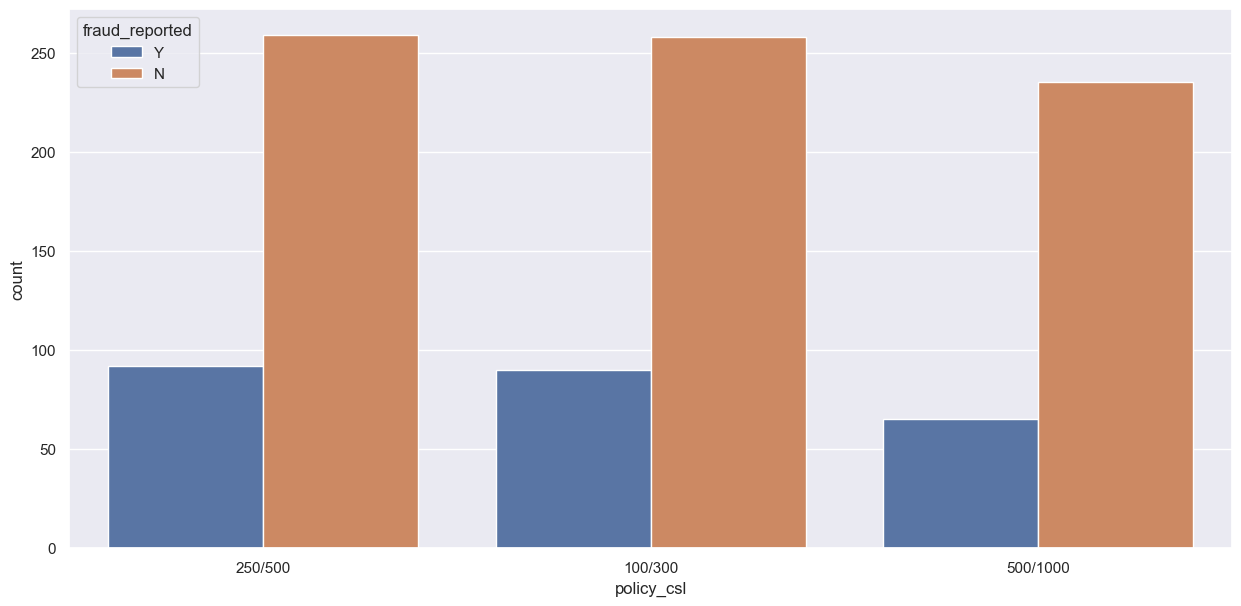

In [141]:
plt.figure(figsize=(15,7))
sns.countplot(x='policy_csl',hue='fraud_reported',data=df)

- In all three csl we same kind of similarity fraud report is also common in all policy_csl

<Axes: xlabel='policy_state', ylabel='count'>

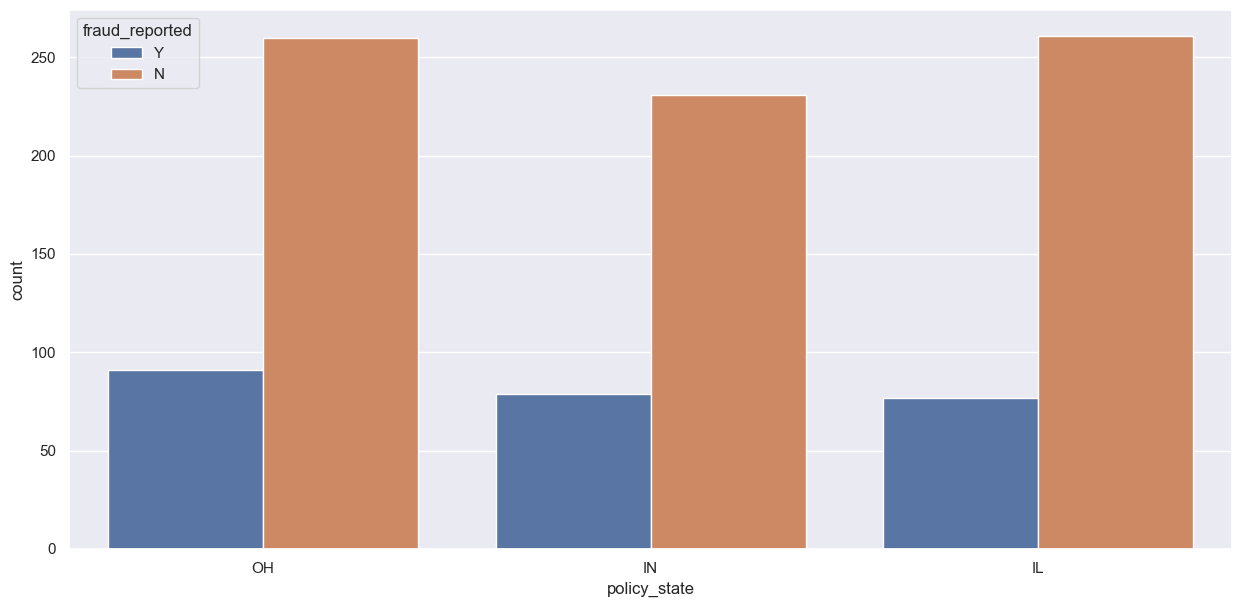

In [142]:
plt.figure(figsize=(15,7))
sns.countplot(x='policy_state',hue='fraud_reported',data=df)

- We have cx from three stats and fraud report almost common in all three states.

<Axes: xlabel='age', ylabel='count'>

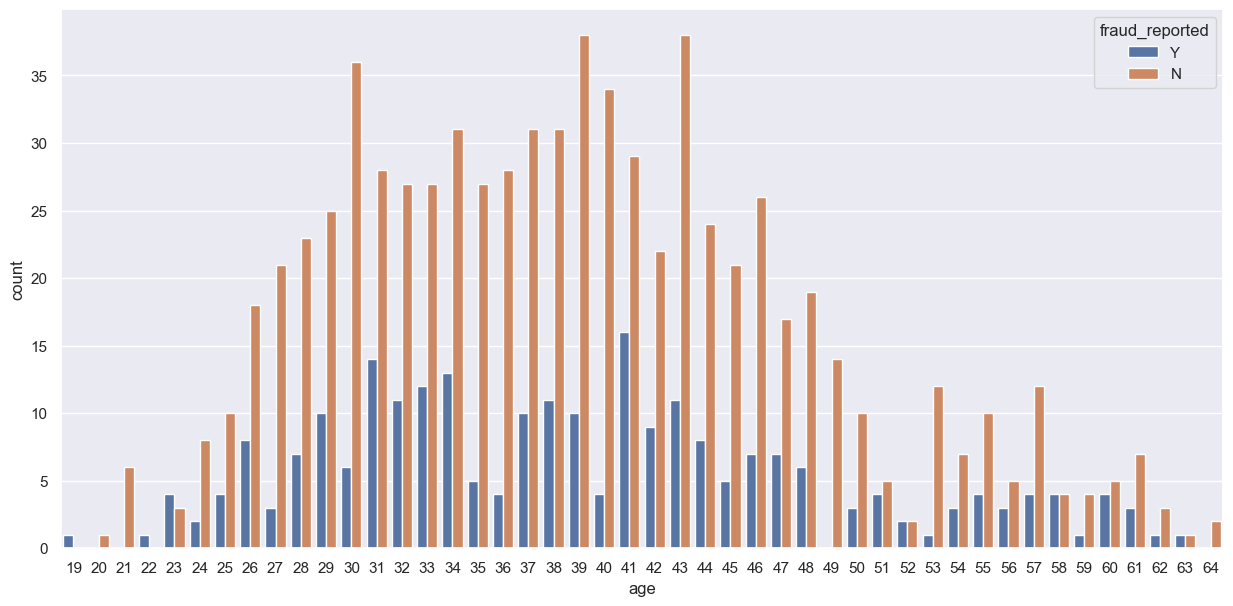

In [143]:
plt.figure(figsize=(15,7))
sns.countplot(x='age',hue='fraud_reported',data=df)

- We see most of the cx are age of 26 to 50
- Fraud reported is higher in cx 26 to 50 of age.

<Axes: xlabel='fraud_reported', ylabel='months_as_customer'>

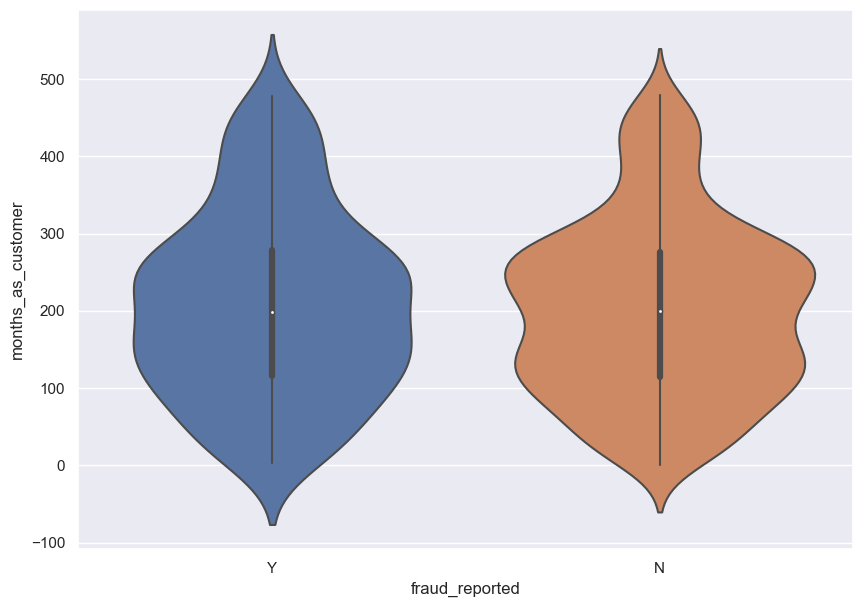

In [144]:
plt.figure(figsize=(10,7))
sns.set(color_codes=True)
sns.violinplot(y='months_as_customer',x='fraud_reported',data=df)

- Most of the cx are 100 to 300 months old.
- We can notice here fraud reort is high in cx between 100 to 250 months old

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, '2014'),
  Text(1, 0, '2006'),
  Text(2, 0, '2000'),
  Text(3, 0, '1990'),
  Text(4, 0, '1997'),
  Text(5, 0, '2011'),
  Text(6, 0, '2002'),
  Text(7, 0, '1999'),
  Text(8, 0, '2012'),
  Text(9, 0, '1998'),
  Text(10, 0, '1992'),
  Text(11, 0, '2005'),
  Text(12, 0, '2004'),
  Text(13, 0, '1994'),
  Text(14, 0, '1991'),
  Text(15, 0, '1996'),
  Text(16, 0, '2013'),
  Text(17, 0, '2008'),
  Text(18, 0, '2003'),
  Text(19, 0, '2010'),
  Text(20, 0, '1993'),
  Text(21, 0, '1995'),
  Text(22, 0, '2007'),
  Text(23, 0, '2001'),
  Text(24, 0, '2009'),
  Text(25, 0, '2015')])

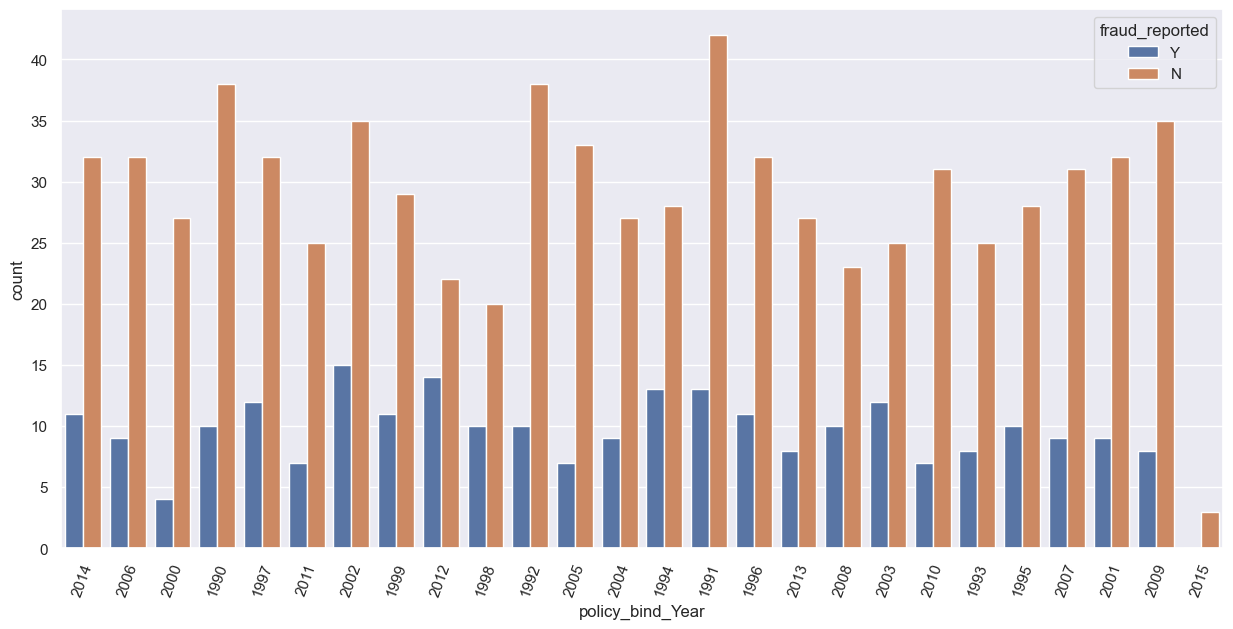

In [145]:
plt.figure(figsize=(15,7))
sns.countplot(x='policy_bind_Year',hue='fraud_reported',data=df)
plt.xticks(rotation=70,)

- Here we notice fraud reported is high in policy_vind_Year of 2014, 2006,1990,1997,2002,1999,2012,1998,1994,2008,2003 and etc thanothers

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '1995'),
  Text(1, 0, '1996'),
  Text(2, 0, '1997'),
  Text(3, 0, '1998'),
  Text(4, 0, '1999'),
  Text(5, 0, '2000'),
  Text(6, 0, '2001'),
  Text(7, 0, '2002'),
  Text(8, 0, '2003'),
  Text(9, 0, '2004'),
  Text(10, 0, '2005'),
  Text(11, 0, '2006'),
  Text(12, 0, '2007'),
  Text(13, 0, '2008'),
  Text(14, 0, '2009'),
  Text(15, 0, '2010'),
  Text(16, 0, '2011'),
  Text(17, 0, '2012'),
  Text(18, 0, '2013'),
  Text(19, 0, '2014'),
  Text(20, 0, '2015')])

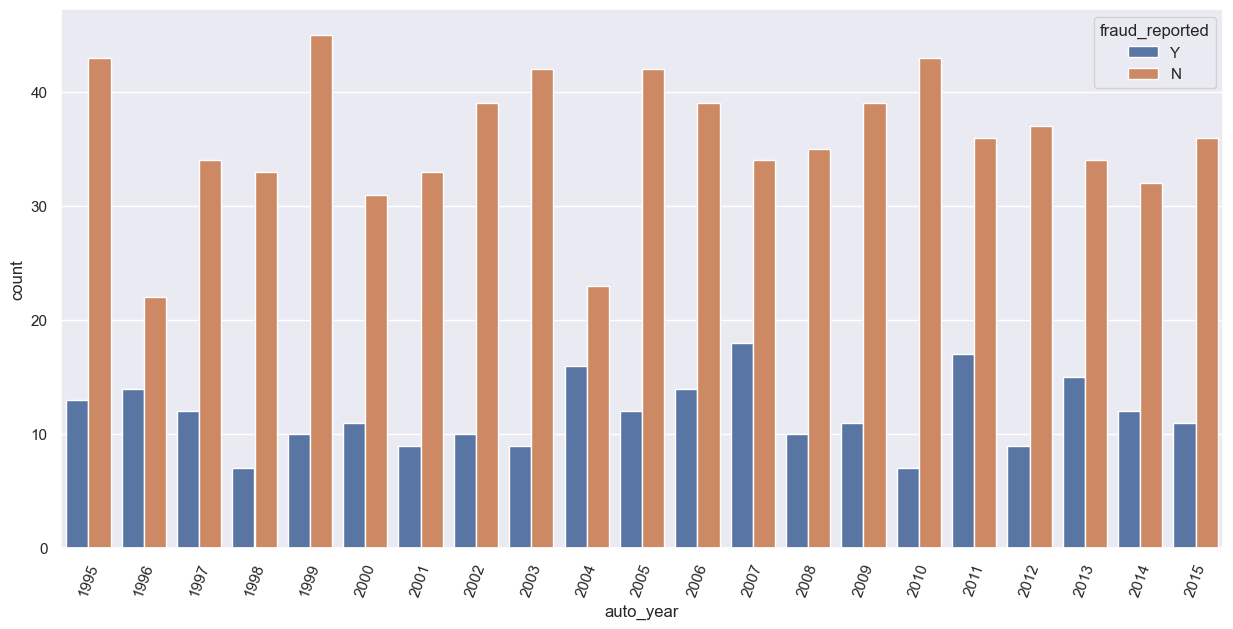

In [146]:
plt.figure(figsize=(15,7))
sns.countplot(x='auto_year',hue='fraud_reported',data=df)
plt.xticks(rotation =70,)

- We can notice we have less vehicle from 1998 and 2010 auto year
- According to vehicle count fraud reported is higher in vehicle of 1996, 2004, 2007, 2011, 2013, 2014 and etc auto year than others

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '92x'),
  Text(1, 0, 'E400'),
  Text(2, 0, 'RAM'),
  Text(3, 0, 'Tahoe'),
  Text(4, 0, 'RSX'),
  Text(5, 0, '95'),
  Text(6, 0, 'Pathfinder'),
  Text(7, 0, 'A5'),
  Text(8, 0, 'Camry'),
  Text(9, 0, 'F150'),
  Text(10, 0, 'A3'),
  Text(11, 0, 'Highlander'),
  Text(12, 0, 'Neon'),
  Text(13, 0, 'MDX'),
  Text(14, 0, 'Maxima'),
  Text(15, 0, 'Legacy'),
  Text(16, 0, 'TL'),
  Text(17, 0, 'Impreza'),
  Text(18, 0, 'Forrestor'),
  Text(19, 0, 'Escape'),
  Text(20, 0, 'Corolla'),
  Text(21, 0, '3 Series'),
  Text(22, 0, 'C300'),
  Text(23, 0, 'Wrangler'),
  Text(24, 0, 'M5'),
  Text(25, 0, 'X5'),
  Text(26, 0, 'Civic'),
  Text(27, 0, 'Passat'),
  Text(28, 0, 'Silverado'),
  Text(29, 0, 'CRV'),
  Text(30, 0, '93'),
  Text(31, 0, 'Accord'),
  Text(32, 0, 'X6'),
  Text(33, 0, 'Malibu'),
  Text(34, 0, 'F

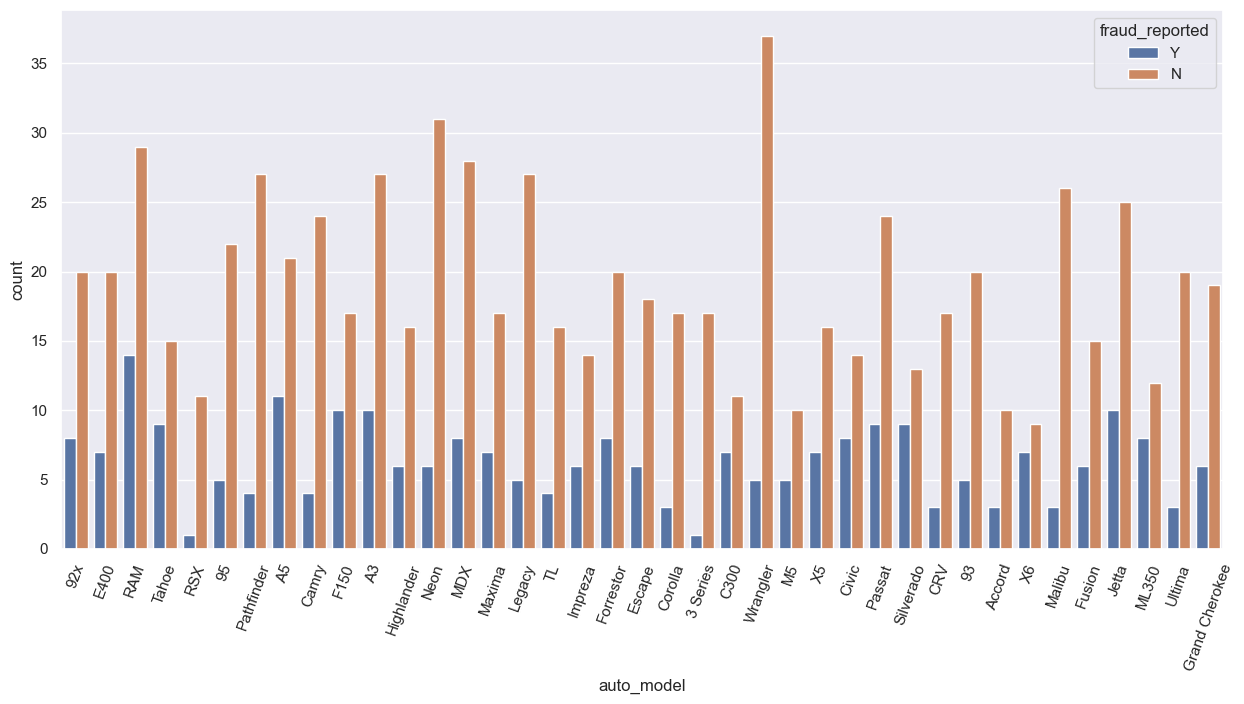

In [147]:
plt.figure(figsize=(15,7))
sns.countplot(x='auto_model',hue='fraud_reported',data=df)
plt.xticks(rotation= 70,)

- Most of auto_model we see in Wrangler, RAM, Pathfinder, Neon and etc.
- We notice Fraud report is higher in 92x, RAM, E400, Tahore, A5, F150, X5, C300, MS, CIVIC, SILVERADO, X6, ML300 and ect auto_models

<Axes: xlabel='auto_make', ylabel='count'>

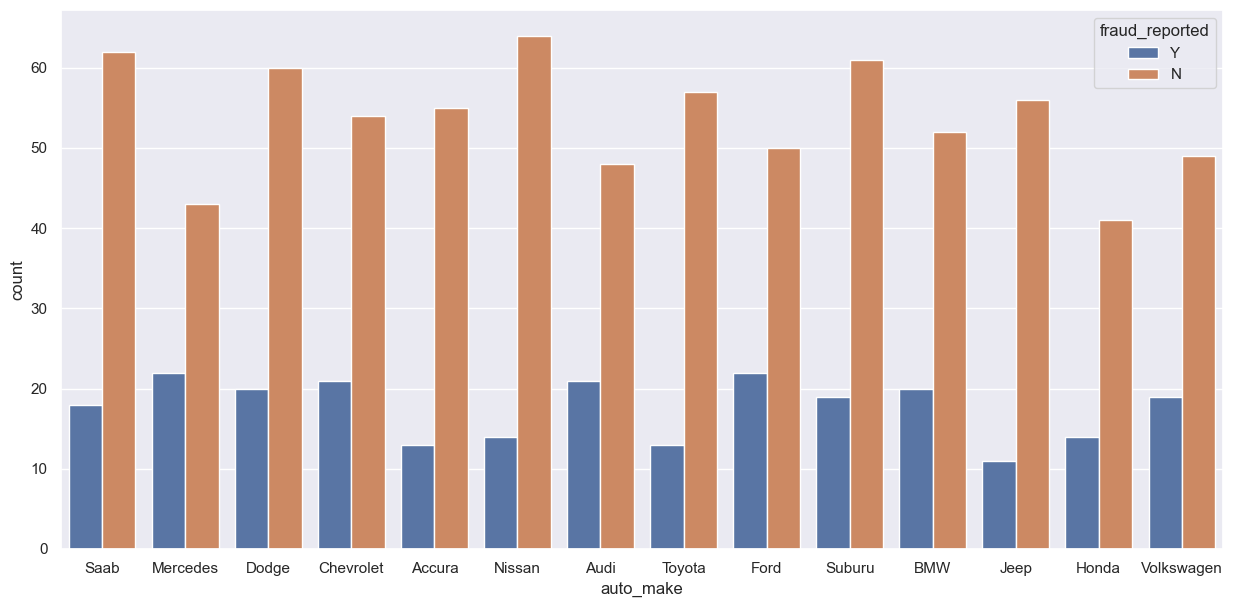

In [148]:
plt.figure(figsize=(15,7))
sns.countplot(x = 'auto_make',hue = 'fraud_reported', data=df)

- Fraud reported claim is higher in Saab, Merceded, Dodge, Chevrolet, Audi, Ford, Suburu, BMW and Volkswagen auto_make
- In other auto_make brand is less than other.

Have done analysis of all important features, some of features don't have much information to define

# Skewness Handling

# Skew and Outliers will be handle in numerical columns only

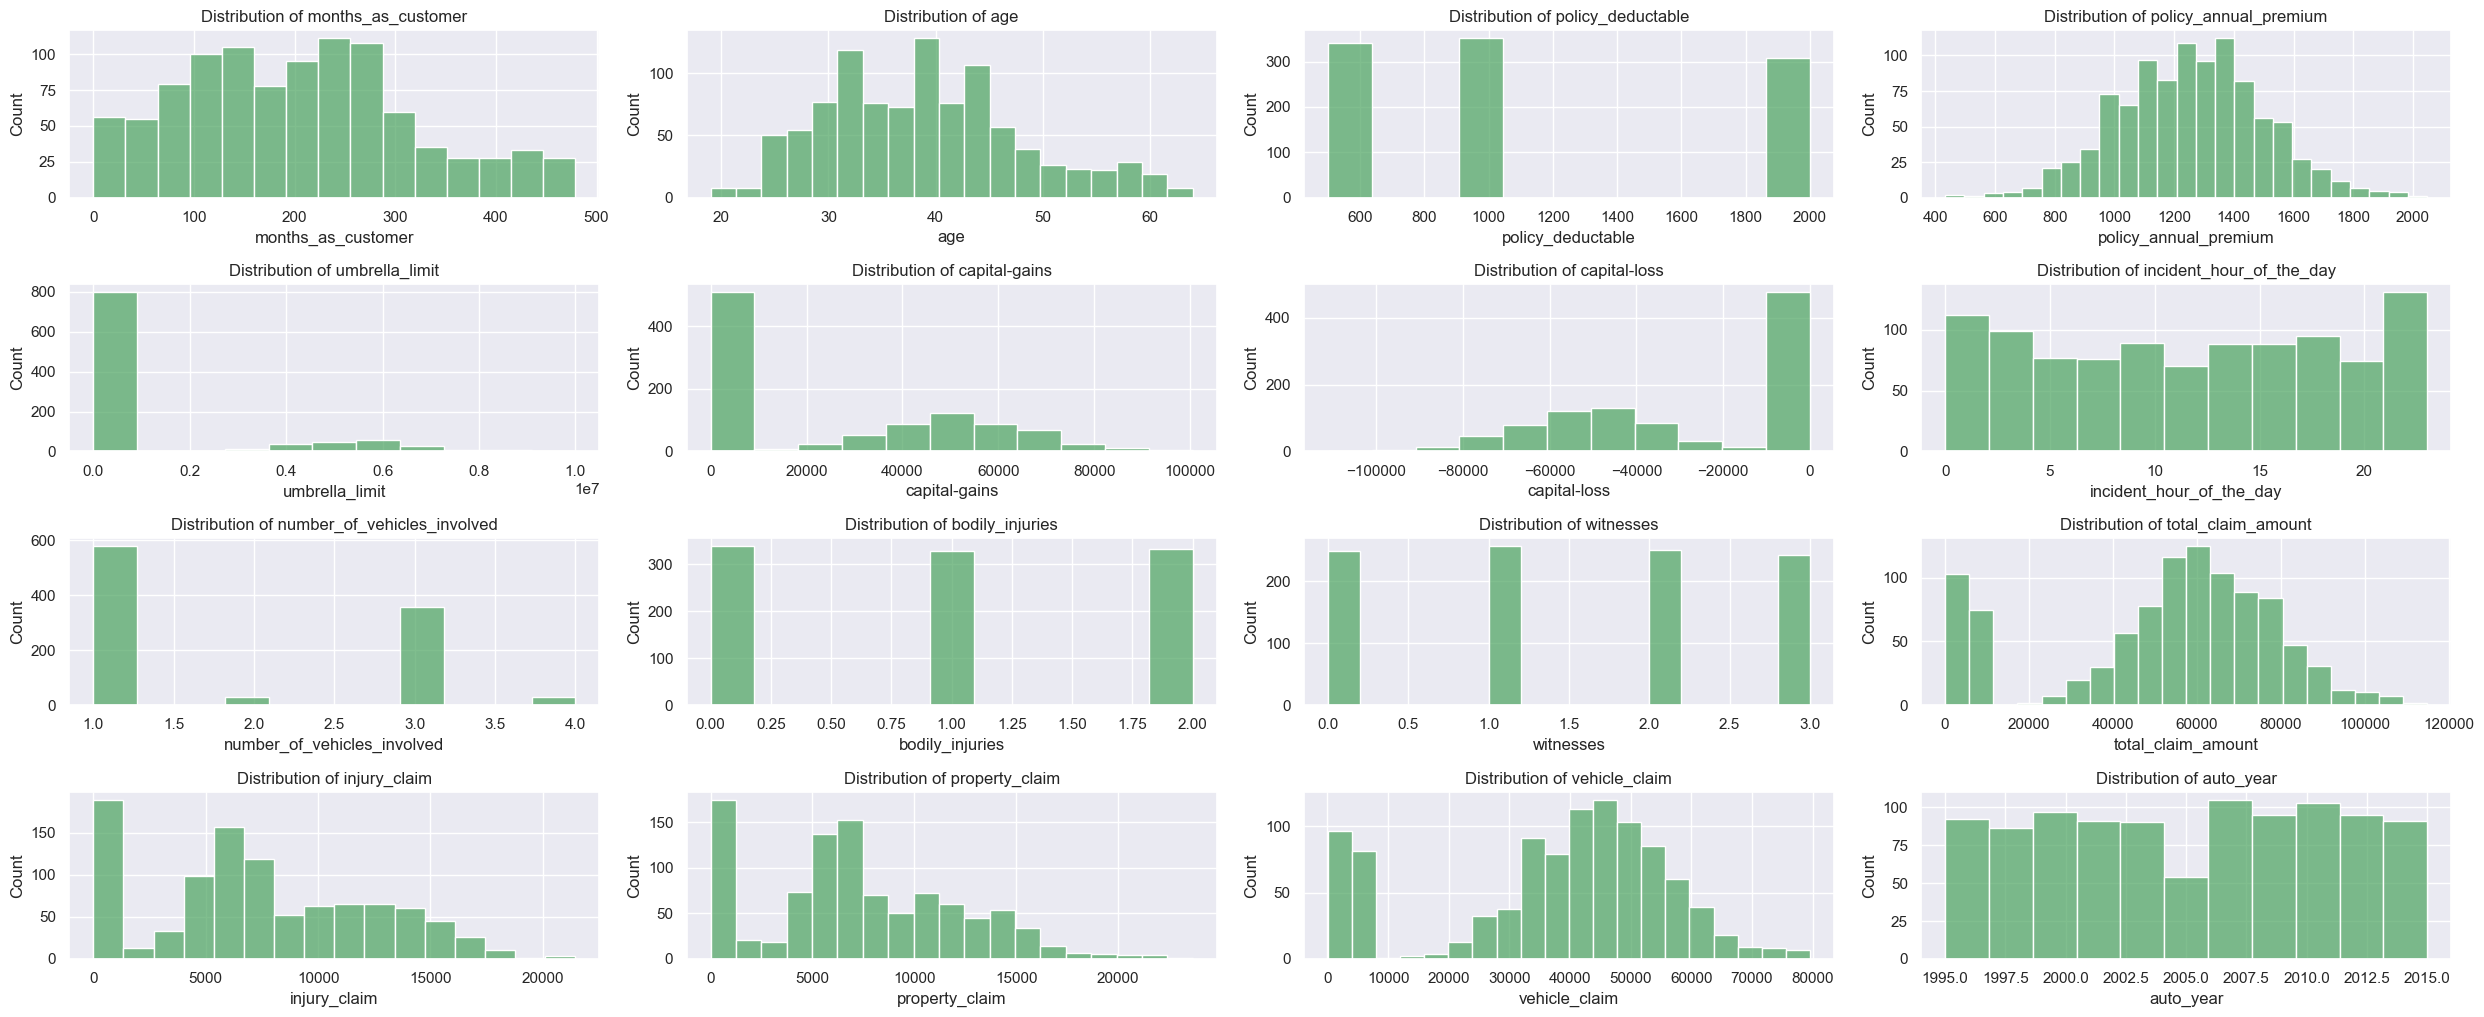

In [152]:
#ploting for numerical columns only
plt.figure(figsize=(25,20))
for i, col in enumerate (df.select_dtypes(include=['int64','float64','int32']).columns):
    plt.subplot(8,4,i+1)
    sns.histplot(df[col],color ='g')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

In [159]:
df.select_dtypes(include=['int64','float64','int32']).skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
_c39                                NaN
dtype: float64

Skewness more than +/-0.5 will we treated

Object and target variable columns will not be treated 

We can see here most of the columns are skewed

will only deal with numerical columns

- umbrella_limit
- total_claim_amount
- vehicle_claim

will be treated

In [163]:
from sklearn.preprocessing import power_transform

df[['umbrella_limit','total_claim_amount','vehicle_calim']]=power_transform(
     df[['umbrella_limit','total_claim_amount','vehicle_claim']],method='yeo-johnson')

# Outliers Handling

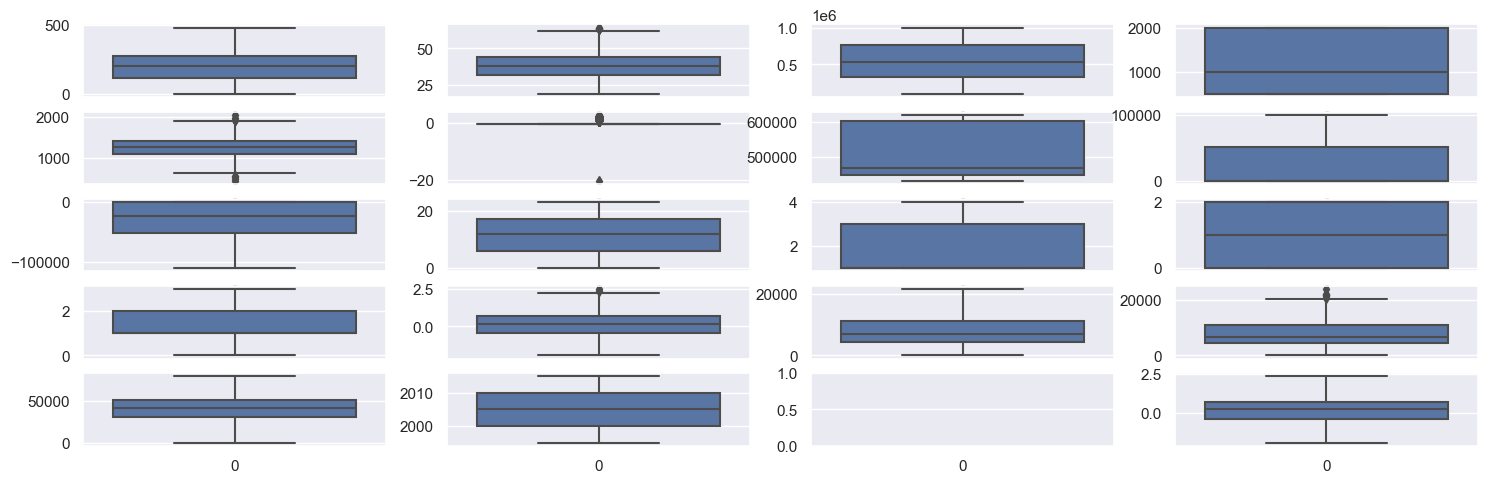

In [164]:
plt.figure(figsize=(18,10))
for i in enumerate(df.select_dtypes(include=['int64','float','int32'])):
    plt.subplot(9,4,i[0]+1)
    sns.boxplot(df[i[1]])

- Only some of columns seems having outliers after skewness removed

# Outliers Removal

# ZSCORE Method

In [165]:
from scipy.stats import zscore
z=np.abs(zscore(df.select_dtypes(include=['int64','float','int32'])))
print(np.where(z>3))

(array([229, 248, 290, 500, 763, 807], dtype=int64), array([ 4,  4,  5, 15,  4,  8], dtype=int64))


In [166]:
df_1=df[(z<3).all(axis=1)]
print(('with outliers::',df.shape))
print("After removing outliers::",df_1.shape)

('with outliers::', (1000, 41))
After removing outliers:: (0, 41)


- After using zscore method we only lose 5 rows from data

# IQR Method

In [171]:
from scipy import stats
numeric_cols = df.select_dtypes(include=['int64', 'float', 'int32'])
IQR = numeric_cols.apply(stats.iqr)
print(IQR)

months_as_customer                160.500000
age                                12.000000
policy_number                  423119.500000
policy_deductable                1500.000000
policy_annual_premium             326.087500
umbrella_limit                      0.000000
insured_zip                    154846.500000
capital-gains                   51025.000000
capital-loss                    51500.000000
incident_hour_of_the_day           11.000000
number_of_vehicles_involved         2.000000
bodily_injuries                     2.000000
witnesses                           1.000000
total_claim_amount                  1.120833
injury_claim                     7010.000000
property_claim                   6440.000000
vehicle_claim                   20530.000000
auto_year                          10.000000
_c39                                     NaN
vehicle_calim                       1.124223
dtype: float64


In [170]:
numerical_df = df.select_dtypes(include=['int64', 'float64', 'int32'])

Q1 = numerical_df.quantile(0.25)
Q3 = numerical_df.quantile(0.75)

IQR = Q3 - Q1

df_out = numerical_df[~((numerical_df < (Q1 - 1.5 * IQR)) | (numerical_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print (df_out.shape)

(781, 20)


- choosing Zscore because there is hope dataloss in IQR

In [174]:
df = df_1

# Using LabelEncoder for convering categorical to numerical

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           0 non-null      int64  
 1   age                          0 non-null      int64  
 2   policy_number                0 non-null      int64  
 3   policy_bind_date             0 non-null      object 
 4   policy_state                 0 non-null      object 
 5   policy_csl                   0 non-null      object 
 6   policy_deductable            0 non-null      int64  
 7   policy_annual_premium        0 non-null      float64
 8   umbrella_limit               0 non-null      float64
 9   insured_zip                  0 non-null      int64  
 10  insured_sex                  0 non-null      object 
 11  insured_education_level      0 non-null      object 
 12  insured_occupation           0 non-null      object 
 13  insured_hobbies              0 non-nu

In [179]:
from sklearn.preprocessing import LabelEncoder

In [180]:
# encoding object columns into Numeric values in df
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
categ_data = df.select_dtypes(exclude=['int64','float64','int32'])
for val in categ_data:
    df[val]=le.fit_transform(df[val].astype(str))

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           0 non-null      int64  
 1   age                          0 non-null      int64  
 2   policy_number                0 non-null      int64  
 3   policy_bind_date             0 non-null      float64
 4   policy_state                 0 non-null      float64
 5   policy_csl                   0 non-null      float64
 6   policy_deductable            0 non-null      int64  
 7   policy_annual_premium        0 non-null      float64
 8   umbrella_limit               0 non-null      float64
 9   insured_zip                  0 non-null      int64  
 10  insured_sex                  0 non-null      float64
 11  insured_education_level      0 non-null      float64
 12  insured_occupation           0 non-null      float64
 13  insured_hobbies              0 non-nu

- All columns are converted into numerical now

# Dividing data into X and Y

In [186]:
X = df.drop(['fraud_reported'],axis=1)
y = df['fraud_reported']

In [188]:
X.shape

(0, 40)

Here are the dimension of x and y

# Scaling X values

In [190]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
X=sc.fit_transform(X)

ValueError: Found array with 0 sample(s) (shape=(0, 40)) while a minimum of 1 is required by MinMaxScaler.